In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from methylation_utils.methylation_utils.analyzer import MethylationAnalyzerHelper
from methylation_utils.methylation_utils.plot import MethPlot
import pyarrow
import pyarrow.feather as feather

In [3]:
ALL_SAMPLES_FILE = "data/old_data/runAll.sh.samples"

METH_DYNAMIC_FOLDER = "data/old_data/bottom/samples_meth_dynamic"
METH_REF_FILE = "data/old_data/parse450K.pl.order.lookup"

In [4]:
DEBUG = False

""" For individual samples """
METH_INTERMEDIATE_HIGH_CUTOFF = 70
METH_INTERMEDIATE_LOW_CUTOFF = 20

# Percent of markers that need to be intermediatly methylated in a window
CUTOFF_PCT = 0.60


LENGTH_CUTTOFF = 1000
COUNT_CUTTOFF = 50
COVERAGE_CUTOFF = 0.75

In [5]:
windows_to_analyze = feather.read_feather("shared_data/windows_to_analyze.cancer.feather")

In [6]:
windows_to_analyze["window name"] = windows_to_analyze["chrom"] + ":" + windows_to_analyze["start"].astype(str) + "-" + windows_to_analyze["end"].astype(str)

In [88]:
windows_to_analyze.set_index("window name", inplace=True)
windows_to_analyze

index chrom      start        end  length CpG_chrm  \
window name                                                                    
chr1:910429-924641            3  chr1     910429     924641   14212     chr1   
chr1:3024260-3084437        149  chr1    3024260    3084437   60177     chr1   
chr1:3533662-3579462        204  chr1    3533662    3579462   45800     chr1   
chr1:18684521-18875365      463  chr1   18684521   18875365  190844     chr1   
chr1:24931074-25067262      556  chr1   24931074   25067262  136188     chr1   
...                         ...   ...        ...        ...     ...      ...   
chr8:11679041-11703773    15709  chr8   11679041   11703773   24732     chr8   
chr8:98947373-99859902    16054  chr8   98947373   99859902  912529     chr8   
chr8:143183416-143248530  16267  chr8  143183416  143248530   65114     chr8   
chr9:135500901-135804653  16722  chr9  135500901  135804653  303752     chr9   
chr9:137435117-137465024  16803  chr9  137435117  137465024   29907     chr9   

                          chrom_num  count_in_window coverage_percentage  \
window name                                                                
chr1:910429-924641                1               23  0.9721059223474683   
chr1:3024260-3084437              1               40  0.9081625433074708   
chr1:3533662-3579462              1               21  0.9539062118772264   
chr1:18684521-18875365            1               24  0.9119062565390249   
chr1:24931074-25067262            1               33  0.9310898223204782   
...                             ...              ...                 ...   
chr8:11679041-11703773            8               24  0.9291503046397529   
chr8:98947373-99859902            8               23  0.8825519947381552   
chr8:143183416-143248530          8               23  0.8875442379249797   
chr9:135500901-135804653          9               45  0.8632304673407073   
chr9:137435117-137465024          9               21  0.9711349384025241   

                          intermediate_percent  dist_to_next  
window name                                                   
chr1:910429-924641                       0.625   1488917.000  
chr1:3024260-3084437                     0.634     55150.000  
chr1:3533662-3579462                     0.636  13665938.000  
chr1:18684521-18875365                   0.600   6055709.000  
chr1:24931074-25067262                   0.647  22366277.000  
...                                        ...           ...  
chr8:11679041-11703773                   0.640  42754095.000  
chr8:98947373-99859902                   0.625  42230004.000  
chr8:143183416-143248530                 0.625           NaN  
chr9:135500901-135804653                 0.609   1630464.000  
chr9:137435117-137465024                 0.636           NaN  

[98 rows x 11 columns]

In [8]:
""" Read in the sample info and methylation reference into memory """
meth_ref = pd.read_csv(METH_REF_FILE, sep="\t")

In [9]:
all_sample_info = pd.read_csv(ALL_SAMPLES_FILE, sep="\t")

In [10]:
all_samples_meth_ref_sorted = feather.read_feather(
    "shared_data/meth_ref_sorted.feather"
)

In [11]:
all_sample_meth_plot = MethPlot(
    all_samples_meth_ref_sorted,
    all_sample_info,
    METH_INTERMEDIATE_LOW_CUTOFF,
    METH_INTERMEDIATE_HIGH_CUTOFF,
)

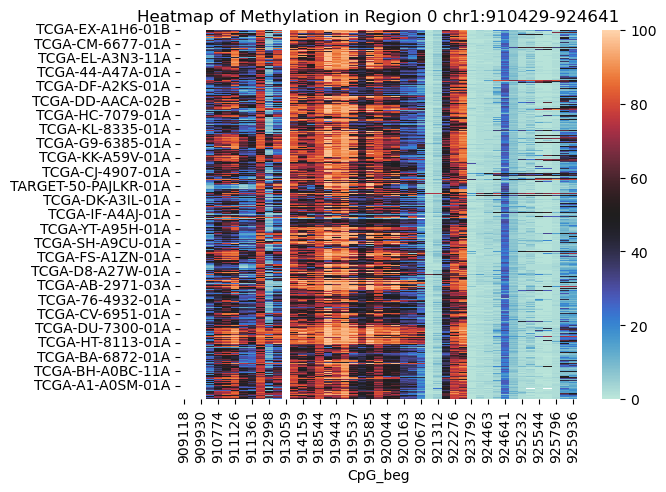

In [12]:
for i, row in windows_to_analyze.iterrows():
    chrom = row["chrom"]
    start = row["start"]
    end = row["end"]
    tail_length = (end - start) * 0.1
    all_sample_meth_plot.plot_multi_sample_heatmap(
        chroms=[chrom],
        pos=[(start - tail_length, end + tail_length)],
        num_samples=10000,
        title=f"Heatmap of Methylation in Region {i} {chrom}:{start}-{end}",
    )
    break

In [13]:
import os,sys
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi']=300
plt.rcParams['pdf.fonttype']=42
# sys.path.append(os.path.expanduser("~/Projects/Github/PyComplexHeatmap/"))
import PyComplexHeatmap as pch
print(pch.__version__)

1.6.4


In [14]:
all_samples_meth_ref_sorted

index         key CpG_chrm  CpG_beg  CpG_end probe_strand  \
0            0  cg13869341     chr1  15864.0  15866.0            -   
1            1  cg14008030     chr1  18826.0  18828.0            -   
2            2  cg12045430     chr1  29406.0  29408.0            -   
3            3  cg20826792     chr1  29424.0  29426.0            -   
4            4  cg00381604     chr1  29434.0  29436.0            -   
...        ...         ...      ...      ...      ...          ...   
485572  485572  cg24238852     None      NaN      NaN            *   
485573  485573  cg15254640     None      NaN      NaN            *   
485574  485574  cg24336839     None      NaN      NaN            *   
485575  485575  cg11478607     None      NaN      NaN            *   
485576  485576  cg08417382     None      NaN      NaN            *   

           probeID                     genesUniq  \
0       cg13869341                        WASH7P   
1       cg14008030              MIR6859-1;WASH7P   
2       cg12045430  MIR1302-2;MIR1302-2HG;WASH7P   
3       cg20826792  MIR1302-2;MIR1302-2HG;WASH7P   
4       cg00381604  MIR1302-2;MIR1302-2HG;WASH7P   
...            ...                           ...   
485572  cg24238852                          None   
485573  cg15254640                          None   
485574  cg24336839                          None   
485575  cg11478607                          None   
485576  cg08417382                          None   

                                       geneNames  \
0                                         WASH7P   
1                               MIR6859-1;WASH7P   
2       MIR1302-2;MIR1302-2HG;MIR1302-2HG;WASH7P   
3       MIR1302-2;MIR1302-2HG;MIR1302-2HG;WASH7P   
4       MIR1302-2;MIR1302-2HG;MIR1302-2HG;WASH7P   
...                                          ...   
485572                                      None   
485573                                      None   
485574                                      None   
485575                                      None   
485576                                      None   

                                   transcriptTypes  \
0                           unprocessed_pseudogene   
1                     miRNA;unprocessed_pseudogene   
2       miRNA;lncRNA;lncRNA;unprocessed_pseudogene   
3       miRNA;lncRNA;lncRNA;unprocessed_pseudogene   
4       miRNA;lncRNA;lncRNA;unprocessed_pseudogene   
...                                            ...   
485572                                        None   
485573                                        None   
485574                                        None   
485575                                        None   
485576                                        None   

                                            transcriptIDs           distToTSS  \
0                                       ENST00000488147.1               13706   
1                     ENST00000619216.1;ENST00000488147.1         -1390;10744   
2       ENST00000607096.1;ENST00000469289.1;ENST000004...  -959;-860;-147;164   
3       ENST00000607096.1;ENST00000469289.1;ENST000004...  -941;-842;-129;146   
4       ENST00000607096.1;ENST00000469289.1;ENST000004...  -931;-832;-119;136   
...                                                   ...                 ...   
485572                                               None                None   
485573                                               None                None   
485574                                               None                None   
485575                                               None                None   
485576                                               None                None   

                         CGI CGIposition  intermediate_count  
0                       None        None                 NaN  
1                       None        None                 NaN  
2       CGI:chr1:28735-29737      Island                 NaN  
3       CGI:chr1:28735-29737      Island    

In [15]:
all_samples = feather.read_feather("shared_data/all_samples.feather")

In [16]:
all_samples.head()

CpG_chrm  CpG_beg  TCGA-EX-A1H6-01B  TCGA-C5-A7CM-01A  TCGA-C5-A2M1-01A  \
0     chr1  15864.0               NaN               NaN               NaN   
1     chr1  18826.0               NaN               NaN               NaN   
2     chr1  29406.0               NaN               NaN               NaN   
3     chr1  29424.0               NaN               NaN               NaN   
4     chr1  29434.0               NaN               NaN               NaN   

   TCGA-LP-A5U2-01A  TCGA-EK-A3GK-01A  TCGA-Q1-A73P-01A  TCGA-UC-A7PI-01A  \
0               NaN               NaN               NaN               NaN   
1               NaN               NaN               NaN               NaN   
2               NaN               NaN               NaN               NaN   
3               NaN               NaN               NaN               NaN   
4               NaN               NaN               NaN               NaN   

   TCGA-JX-A3Q8-01A  ...  TCGA-OL-A66L-01A  TCGA-AR-A0TR-01A  \
0               NaN  ...               NaN               NaN   
1               NaN  ...               NaN               NaN   
2               NaN  ...               NaN               NaN   
3               NaN  ...               NaN               NaN   
4               NaN  ...               NaN               NaN   

   TCGA-BH-A0HA-01A  TCGA-BH-A1ES-06A  TCGA-E2-A15J-01A  TCGA-B6-A40C-01A  \
0               NaN               NaN               NaN               NaN   
1               NaN               NaN               NaN               NaN   
2               NaN               NaN               NaN               NaN   
3               NaN               NaN               NaN               NaN   
4               NaN               NaN               NaN               NaN   

   TCGA-BH-A0B3-11B  TCGA-E9-A1QZ-01A  TCGA-S3-AA10-01A  chrom_num  
0               NaN               NaN               NaN          1  
1               NaN               NaN               NaN          1  
2               NaN               NaN               NaN          1  
3               NaN               NaN               NaN          1  
4               NaN               NaN               NaN          1  

[5 rows x 9717 columns]

In [17]:
all_samples_copy = all_sample_info.set_index("sample")

In [18]:
all_samples_copy

expression  \
sample                                                                
TCGA-EX-A1H6-01B  72ac3cfa-31f8-4371-867d-ab897b2b7cb9.rna_seq.a...   
TCGA-C5-A7CM-01A  8d405837-5989-4de9-a19c-4f7af4af65d3.rna_seq.a...   
TCGA-C5-A2M1-01A  35e5936c-9722-4a49-9bb3-5c244bd10b13.rna_seq.a...   
TCGA-LP-A5U2-01A  0aa549e1-bb9a-4489-b815-1c22817100d8.rna_seq.a...   
TCGA-EK-A3GK-01A  20e72530-f9cc-44d6-81f9-bb7c49f1f7e4.rna_seq.a...   
...                                                             ...   
TCGA-E2-A15J-01A  723ed50c-2c78-4a3a-9f6e-9f9e8e264f6b.rna_seq.a...   
TCGA-B6-A40C-01A  32c15b29-da14-4eb5-8c86-39efc94319df.rna_seq.a...   
TCGA-BH-A0B3-11B  d920c232-82ae-48f9-98d1-b94bf4a45d8d.rna_seq.a...   
TCGA-E9-A1QZ-01A  0f168687-6f42-4d92-8f91-13efde785a0c.rna_seq.a...   
TCGA-S3-AA10-01A  df6af593-6a85-4f5f-8dbe-c32df5a85ef6.rna_seq.a...   

                                                    expression_file  \
sample                                                                
TCGA-EX-A1H6-01B  /uufs/chpc.utah.edu/common/home/clementm-group...   
TCGA-C5-A7CM-01A  /uufs/chpc.utah.edu/common/home/clementm-group...   
TCGA-C5-A2M1-01A  /uufs/chpc.utah.edu/common/home/clementm-group...   
TCGA-LP-A5U2-01A  /uufs/chpc.utah.edu/common/home/clementm-group...   
TCGA-EK-A3GK-01A  /uufs/chpc.utah.edu/common/home/clementm-group...   
...                                                             ...   
TCGA-E2-A15J-01A  /uufs/chpc.utah.edu/common/home/clementm-group...   
TCGA-B6-A40C-01A  /uufs/chpc.utah.edu/common/home/clementm-group...   
TCGA-BH-A0B3-11B  /uufs/chpc.utah.edu/common/home/clementm-group...   
TCGA-E9-A1QZ-01A  /uufs/chpc.utah.edu/common/home/clementm-group...   
TCGA-S3-AA10-01A  /uufs/chpc.utah.edu/common/home/clementm-group...   

                                                        methylation  \
sample                                                                
TCGA-EX-A1H6-01B  b04fb3ae-1075-4e4c-b519-743dd948ae45.methylati...   
TCGA-C5-A7CM-01A  d1efc9b7-7499-4f95-90bb-7613a42ce82f.methylati...   
TCGA-C5-A2M1-01A  c56b4dcd-d498-4394-9fc9-a449647021b1.methylati...   
TCGA-LP-A5U2-01A  e51138bf-5d5c-4b32-ad9a-d8b84c2e541f.methylati...   
TCGA-EK-A3GK-01A  1d7814b0-8818-4fcb-87e7-fef883f7571f.methylati...   
...                                                             ...   
TCGA-E2-A15J-01A  0b7f6506-a464-4635-ae6b-2820a0ab5206.methylati...   
TCGA-B6-A40C-01A  f9dd5273-22ef-46c9-a8ad-c501825d2f3e.methylati...   
TCGA-BH-A0B3-11B  b504445f-170c-44ce-8a84-70db6930397f.methylati...   
TCGA-E9-A1QZ-01A  a26af0de-1dff-4345-adf2-d3794fd33a6d.methylati...   
TCGA-S3-AA10-01A  6b70879c-ab6f-4ed2-9f19-57558b01d140.methylati...   

                                                   methylation_file  \
sample                                                                
TCGA-EX-A1H6-01B  /uufs/chpc.utah.edu/common/home/clementm-group...   
TCGA-C5-A7CM-01A  /uufs/chpc.utah.edu/common/home/clementm-group...   
TCGA-C5-A2M1-01A  /uufs/chpc.utah.edu/common/home/clementm-group...   
TCGA-LP-A5U2-01A  /uufs/chpc.utah.edu/common/home/clementm-group...   
TCGA-EK-A3GK-01A  /uufs/chpc.utah.edu/common/home/clementm-group...   
...                                                             ...   
TCGA-E2-A15J-01A  /uufs/chpc.utah.edu/common/home/clementm-group...   
TCGA-B6-A40C-01A  /uufs/chpc.utah.edu/common/home/clementm-group...   
TCGA-BH-A0B3-11B  /uufs/chpc.utah.edu/common/home/clementm-group...   
TCGA-E9-A1QZ-01A  /uufs/chpc.utah.edu/common/home/clementm-group...   
TCGA-S3-AA10-01A  /uufs/chpc.utah.edu/common/home/clementm-group...   

                                             sample_id project_id  \
sample                                                              
TCGA-EX-A1H6-01B  fe018d31-eee8-4335-96a1-95eceabfadf1  TCGA-CESC   
TCGA-C5-A7CM-01A  fefa6b4c-243d-4544-accc-11515bbe516e  TCGA-CESC   
TCGA-C5-A2M1-01A  065bb06f-5bb7-4f79-b374-97a3011f22ae  TCGA-CESC   
TCGA-LP-A5U2-01A

In [19]:
all_samples_copy = all_samples_copy[
    [
        "sample_type",
        "project_descriptor",
    ]
].sort_values(
    by=[
        "sample_type",
        "project_descriptor",
    ]
)

In [20]:
all_samples_copy

sample_type  \
sample                                       
TCGA-DV-A4W0-05A  Additional - New Primary   
TCGA-UZ-A9PS-05A  Additional - New Primary   
TCGA-P7-A5NY-05A  Additional - New Primary   
TCGA-SR-A6MX-05A  Additional - New Primary   
TCGA-QR-A6GZ-05A  Additional - New Primary   
...                                    ...   
TCGA-BG-A3EW-11A       Solid Tissue Normal   
TCGA-AJ-A3NH-11A       Solid Tissue Normal   
TCGA-BG-A3PP-11A       Solid Tissue Normal   
TCGA-DI-A2QU-11A       Solid Tissue Normal   
TCGA-DI-A2QY-11A       Solid Tissue Normal   

                                     project_descriptor  
sample                                                   
TCGA-DV-A4W0-05A      Kidney renal clear cell carcinoma  
TCGA-UZ-A9PS-05A  Kidney renal papillary cell carcinoma  
TCGA-P7-A5NY-05A     Pheochromocytoma and Paraganglioma  
TCGA-SR-A6MX-05A     Pheochromocytoma and Paraganglioma  
TCGA-QR-A6GZ-05A     Pheochromocytoma and Paraganglioma  
...                                                 ...  
TCGA-BG-A3EW-11A   Uterine Corpus Endometrial Carcinoma  
TCGA-AJ-A3NH-11A   Uterine Corpus Endometrial Carcinoma  
TCGA-BG-A3PP-11A   Uterine Corpus Endometrial Carcinoma  
TCGA-DI-A2QU-11A   Uterine Corpus Endometrial Carcinoma  
TCGA-DI-A2QY-11A   Uterine Corpus Endometrial Carcinoma  

[9714 rows x 2 columns]

Starting plotting HeatmapAnnotations


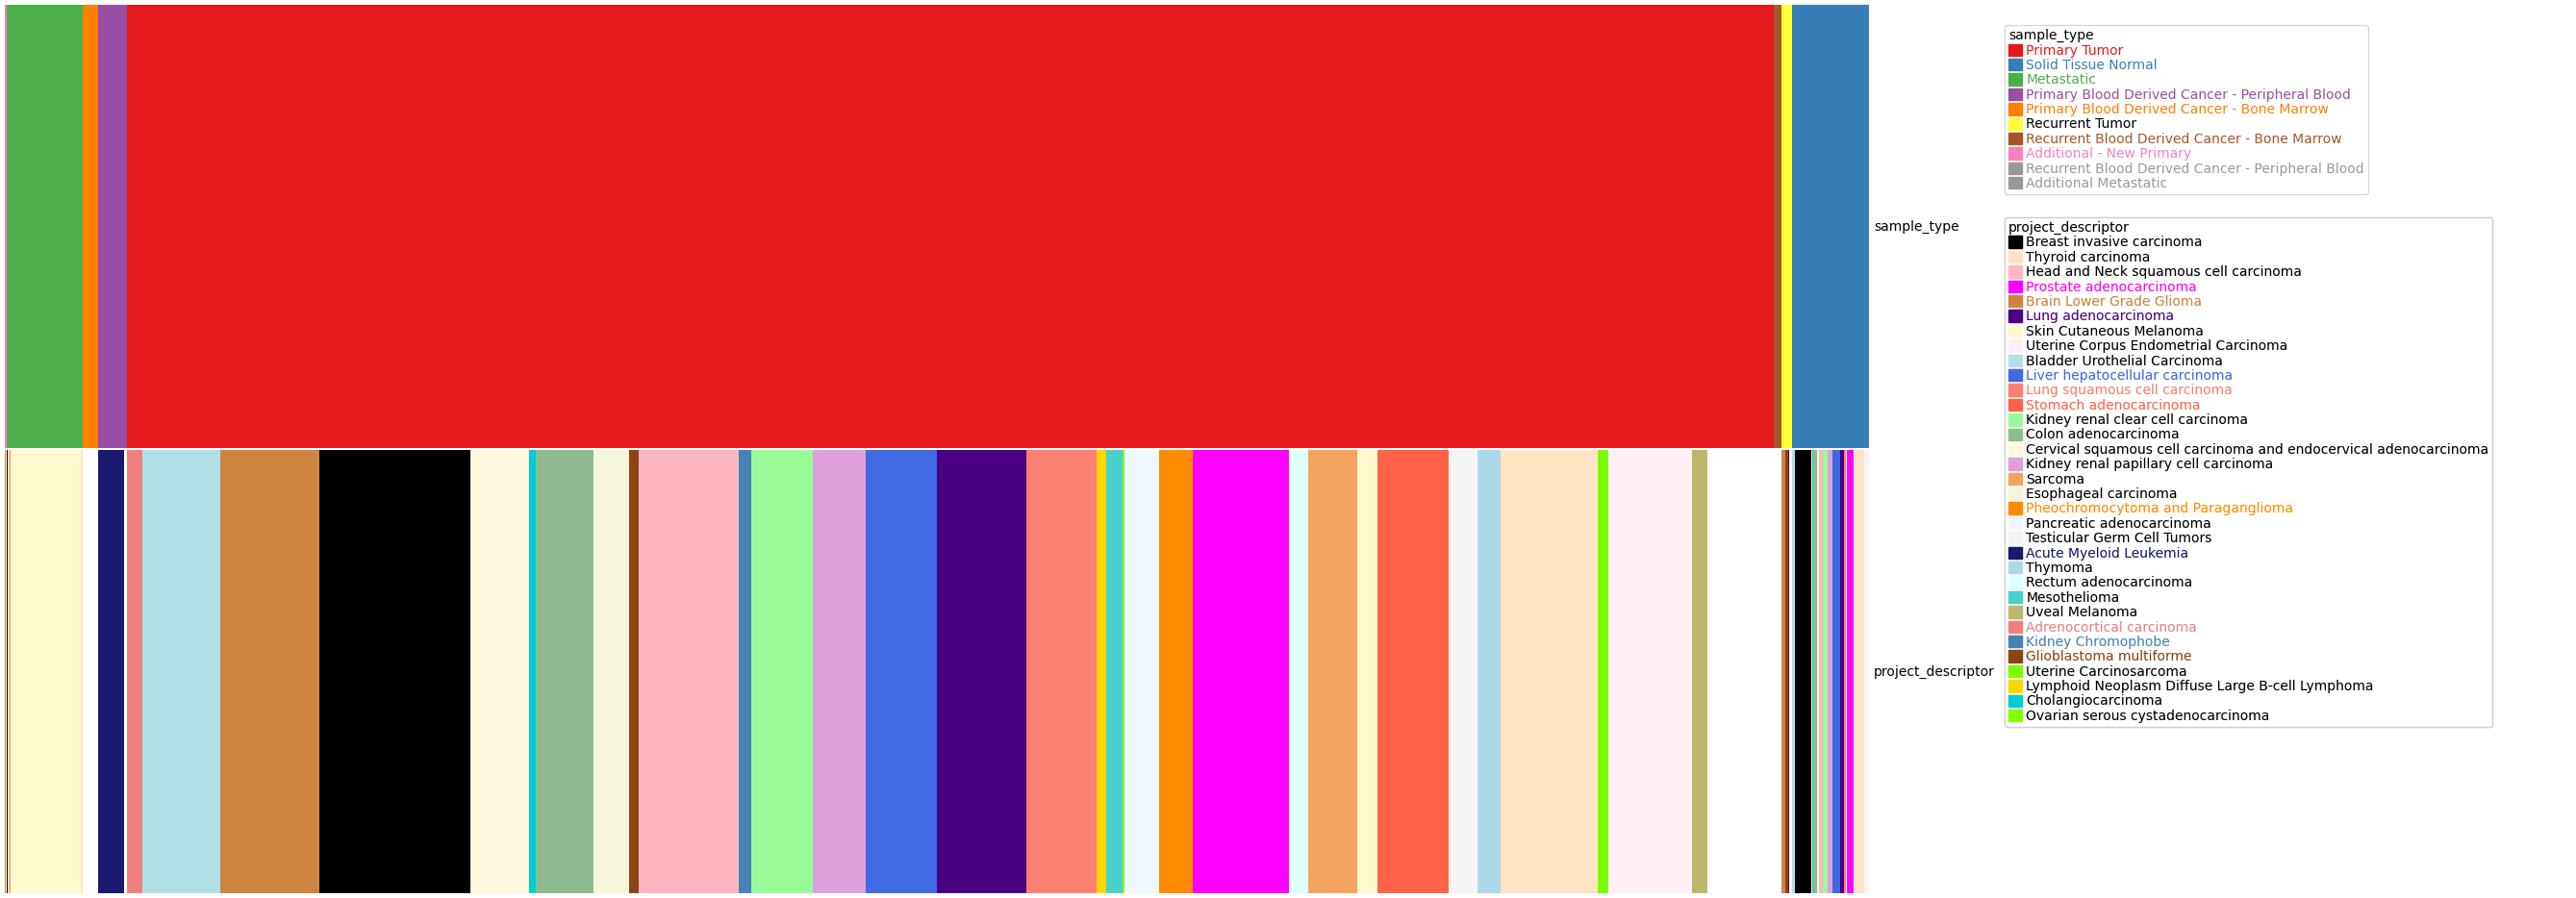

In [21]:
plt.figure(figsize=(25, 12))
col_ha = pch.HeatmapAnnotation(
    df=all_samples_copy,
    plot=True,
    legend=True,
    legend_gap=5,
    legend_width=150,
    hgap=0.5,
    axis=1,
)
plt.show()

In [22]:
# Generate example dataset (random)
df = pd.DataFrame(["GroupA"] * 5 + ["GroupB"] * 5, columns=["AB"])
df["CD"] = ["C"] * 3 + ["D"] * 3 + ["G"] * 4
df["EF"] = ["E"] * 6 + ["F"] * 2 + ["H"] * 2
df["F"] = np.random.normal(0, 1, 10)
df.index = ["sample" + str(i) for i in range(1, df.shape[0] + 1)]

Starting plotting HeatmapAnnotations


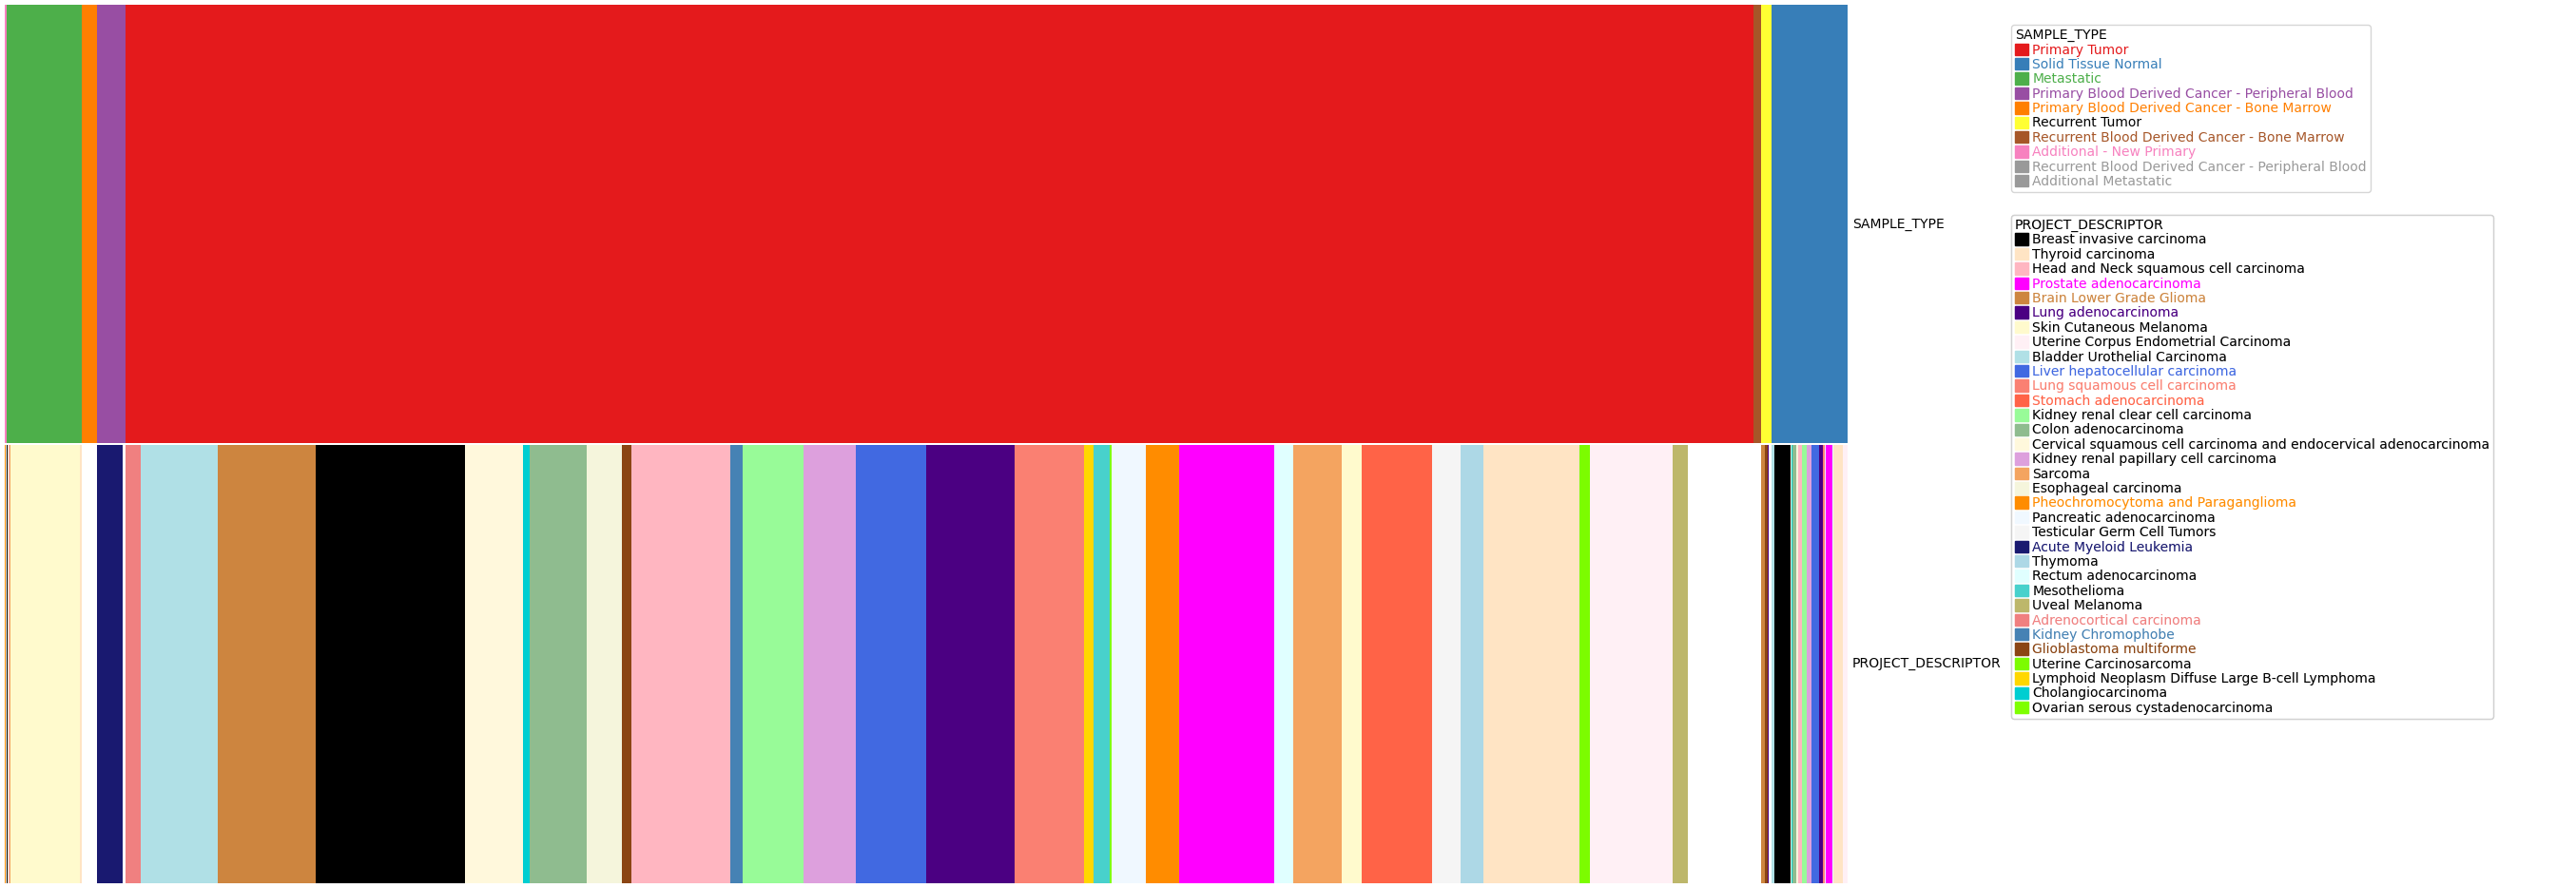

In [23]:
plt.figure(figsize=(25, 12))
col_annon = pch.HeatmapAnnotation(
    SAMPLE_TYPE=pch.anno_simple(all_samples_copy.sample_type, legend=True),
    axis=1,
    PROJECT_DESCRIPTOR=pch.anno_simple(
        all_samples_copy.project_descriptor,
        legend=True,
        text_kws={"color": "black"},
    ),
    plot=True,
    legend=False,
    legend_gap=5,
    hgap=0.5,
    legend_width=150,
)
plt.show()

In [24]:
all_samples.head()

CpG_chrm  CpG_beg  TCGA-EX-A1H6-01B  TCGA-C5-A7CM-01A  TCGA-C5-A2M1-01A  \
0     chr1  15864.0               NaN               NaN               NaN   
1     chr1  18826.0               NaN               NaN               NaN   
2     chr1  29406.0               NaN               NaN               NaN   
3     chr1  29424.0               NaN               NaN               NaN   
4     chr1  29434.0               NaN               NaN               NaN   

   TCGA-LP-A5U2-01A  TCGA-EK-A3GK-01A  TCGA-Q1-A73P-01A  TCGA-UC-A7PI-01A  \
0               NaN               NaN               NaN               NaN   
1               NaN               NaN               NaN               NaN   
2               NaN               NaN               NaN               NaN   
3               NaN               NaN               NaN               NaN   
4               NaN               NaN               NaN               NaN   

   TCGA-JX-A3Q8-01A  ...  TCGA-OL-A66L-01A  TCGA-AR-A0TR-01A  \
0               NaN  ...               NaN               NaN   
1               NaN  ...               NaN               NaN   
2               NaN  ...               NaN               NaN   
3               NaN  ...               NaN               NaN   
4               NaN  ...               NaN               NaN   

   TCGA-BH-A0HA-01A  TCGA-BH-A1ES-06A  TCGA-E2-A15J-01A  TCGA-B6-A40C-01A  \
0               NaN               NaN               NaN               NaN   
1               NaN               NaN               NaN               NaN   
2               NaN               NaN               NaN               NaN   
3               NaN               NaN               NaN               NaN   
4               NaN               NaN               NaN               NaN   

   TCGA-BH-A0B3-11B  TCGA-E9-A1QZ-01A  TCGA-S3-AA10-01A  chrom_num  
0               NaN               NaN               NaN          1  
1               NaN               NaN               NaN          1  
2               NaN               NaN               NaN          1  
3               NaN               NaN               NaN          1  
4               NaN               NaN               NaN          1  

[5 rows x 9717 columns]

In [25]:
def populate_window_averages(windows, all_samples):
    all_samples_windows_average = []

    for i, row in windows.iterrows():
        chrom = row["chrom"]
        start = row["start"]
        end = row["end"]
        average_methylation = (
            all_samples[
                (all_samples["CpG_chrm"] == chrom)
                & (all_samples["CpG_beg"] >= start)
                & (all_samples["CpG_beg"] <= end)
            ]
            .drop(["CpG_chrm", "CpG_beg", "chrom_num"], axis=1)
            .mean(axis=0)
            .to_frame()
            .transpose()
        )
        all_samples_windows_average.append(list(average_methylation.values[0]))
    return all_samples_windows_average

In [26]:
all_samples_windows_average = populate_window_averages(windows_to_analyze, all_samples)

In [27]:
all_samples_windows_average_df = pd.DataFrame(
    all_samples_windows_average,
    columns=all_samples.drop(["CpG_chrm", "CpG_beg", "chrom_num"], axis=1).columns
)

In [28]:
all_samples_windows_average_df

TCGA-EX-A1H6-01B  TCGA-C5-A7CM-01A  TCGA-C5-A2M1-01A  TCGA-LP-A5U2-01A  \
0          56.200000         43.457143         45.114286         35.714286   
1          59.037500         56.101266         58.500000         69.814815   
2          76.357143         61.904762         70.142857         57.976190   
3          80.090909         61.111111         63.481481         70.963636   
4          71.272727         68.381818         69.454545         66.345455   
..               ...               ...               ...               ...   
93         63.611111         50.150943         50.685185         62.259259   
94         64.203125         62.213115         62.969231         58.158730   
95         55.132075         47.584906         47.339623         49.698113   
96         75.726415         64.009434         66.320755         69.066038   
97         62.125000         49.050000         56.600000         50.125000   

    TCGA-EK-A3GK-01A  TCGA-Q1-A73P-01A  TCGA-UC-A7PI-01A  TCGA-JX-A3Q8-01A  \
0          37.314286         55.000000         46.685714         50.628571   
1          48.687500         63.443038         63.202532         56.169014   
2          65.571429         74.571429         67.428571         85.447368   
3          51.218182         77.500000         80.192308         73.945455   
4          69.800000         72.927273         75.509091         73.636364   
..               ...               ...               ...               ...   
93         47.735849         60.882353         57.326923         64.925926   
94         61.075758         63.734375         69.894737         69.671875   
95         38.641509         54.653846         54.826923         50.301887   
96         52.447619         75.288462         74.628571         63.771429   
97         55.875000         58.400000         58.050000         60.950000   

    TCGA-EA-A556-01A  TCGA-C5-A1ME-01A  ...  TCGA-EW-A1P1-01A  \
0          42.114286         53.771429  ...         48.914286   
1          26.924051         61.000000  ...         50.617284   
2          72.571429         76.809524  ...         71.452381   
3          43.962963         77.490909  ...         67.981481   
4          66.272727         77.592593  ...         62.563636   
..               ...               ...  ...               ...   
93         16.641509         59.792453  ...         28.092593   
94         69.242424         67.555556  ...         61.707692   
95         26.377358         57.905660  ...         54.830189   
96         55.764151         71.423077  ...         69.462264   
97         53.075000         61.666667  ...         61.075000   

    TCGA-OL-A66L-01A  TCGA-AR-A0TR-01A  TCGA-BH-A0HA-01A  TCGA-BH-A1ES-06A  \
0          50.971429         46.714286         53.114286         44.428571   
1          50.846154         36.012821         41.243590         37.775000   
2          68.928571         62.952381         68.214286         66.500000   
3          71.307692         69.784314         72.264151         68.425926   
4          67.981818         77.709091         63.381818         65.890909   
..               ...               ...               ...               ...   
93         42.816327         39.571429         34.735849         56.685185   
94         61.322034         58.037037         67.950820         68.369231   
95         54.826923         53.780000         53.941176         42.320755   
96         69.173077         56.971429         67.632075         67.457143   
97         62.897436         64.675000         65.150000         60.487179   

    TCGA-E2-A15J-01A  TCGA-B6-A40C-01A  TCGA-BH-A0B3-11B  TCGA-E9-A1QZ-01A  \
0          46.628571         43.371429         46.142857         49.371429   
1          54.410256         46.864198         47.153846         42.275000   
2          63.714286         66.000000         68.476190         66.285714   
3          69.716981         70.207547         70.339623         62.781818   
4          75.018182  

In [29]:
len(set(all_samples_copy.index))

9714

In [30]:
len(set(all_samples_windows_average_df.columns))

9714

In [31]:
all_samples_copy.sample_type

sample
TCGA-DV-A4W0-05A    Additional - New Primary
TCGA-UZ-A9PS-05A    Additional - New Primary
TCGA-P7-A5NY-05A    Additional - New Primary
TCGA-SR-A6MX-05A    Additional - New Primary
TCGA-QR-A6GZ-05A    Additional - New Primary
                              ...           
TCGA-BG-A3EW-11A         Solid Tissue Normal
TCGA-AJ-A3NH-11A         Solid Tissue Normal
TCGA-BG-A3PP-11A         Solid Tissue Normal
TCGA-DI-A2QU-11A         Solid Tissue Normal
TCGA-DI-A2QY-11A         Solid Tissue Normal
Name: sample_type, Length: 9714, dtype: object

In [32]:
all_samples_copy.project_descriptor

sample
TCGA-DV-A4W0-05A        Kidney renal clear cell carcinoma
TCGA-UZ-A9PS-05A    Kidney renal papillary cell carcinoma
TCGA-P7-A5NY-05A       Pheochromocytoma and Paraganglioma
TCGA-SR-A6MX-05A       Pheochromocytoma and Paraganglioma
TCGA-QR-A6GZ-05A       Pheochromocytoma and Paraganglioma
                                    ...                  
TCGA-BG-A3EW-11A     Uterine Corpus Endometrial Carcinoma
TCGA-AJ-A3NH-11A     Uterine Corpus Endometrial Carcinoma
TCGA-BG-A3PP-11A     Uterine Corpus Endometrial Carcinoma
TCGA-DI-A2QU-11A     Uterine Corpus Endometrial Carcinoma
TCGA-DI-A2QY-11A     Uterine Corpus Endometrial Carcinoma
Name: project_descriptor, Length: 9714, dtype: object

In [84]:
def complex_heatplot(
    plot_data,
    sample_info,
    col_split,
    figsize=(30, 10),
    row_cluster=True,
    col_cluster=True,
    project_cmap="auto",
):
    plt.figure(figsize=figsize)

    col_annon = pch.HeatmapAnnotation(
        PROJECT_DESCRIPTOR=pch.anno_simple(
            sample_info.project_descriptor,
            legend=True,
            text_kws={"color": "black"},
            cmap=project_cmap,
        ),
        SAMPLE_TYPE=pch.anno_simple(sample_info.sample_type, legend=True),
        axis=1,
        legend=False,
        legend_gap=5,
        hgap=0.5,
        legend_width=150,
    )
    cm = pch.ClusterMapPlotter(
        top_annotation=col_annon,
        data=plot_data,
        col_cluster=col_cluster,
        row_cluster=row_cluster,
        col_split=col_split,
        row_split=3,
        col_split_gap=2,
        row_split_gap=4,
        label="values",
        row_dendrogram=True,
        show_rownames=True,
        show_colnames=True,
        row_names_side="right",
        tree_kws={"row_cmap": "Set1", "colors": "blue"},
        verbose=0,
        legend_gap=5,
        cmap="RdYlBu_r",
        xticklabels_kws={"labelrotation": -90, "labelcolor": "black"},
    )

    plt.show()
    return cm

Starting plotting HeatmapAnnotations


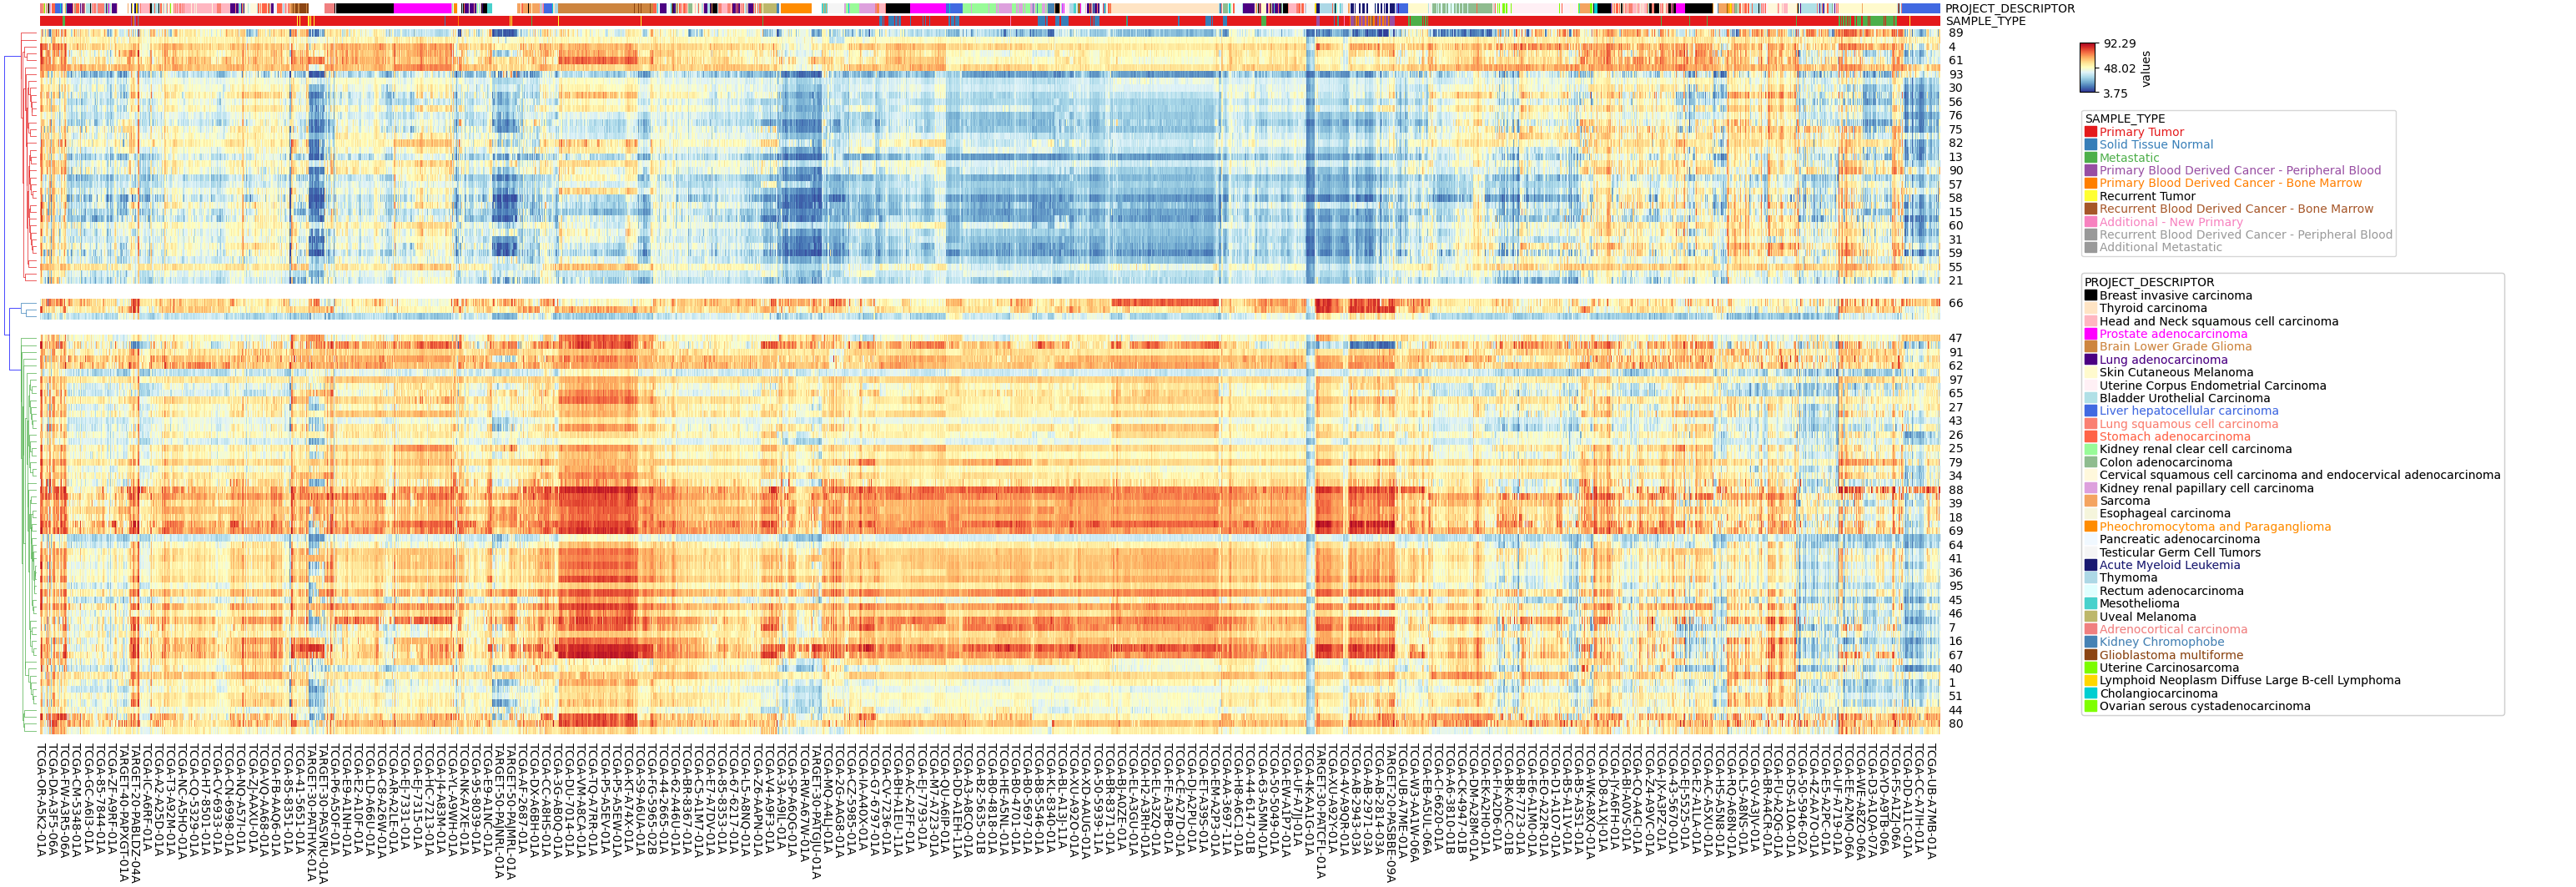

In [85]:
complex_heatplot(
    all_samples_windows_average_df, all_samples_copy, None, figsize=(30, 10)
)

In [87]:
all_samples_windows_average_df

TCGA-EX-A1H6-01B  TCGA-C5-A7CM-01A  TCGA-C5-A2M1-01A  TCGA-LP-A5U2-01A  \
0             56.200            43.457            45.114            35.714   
1             59.038            56.101            58.500            69.815   
2             76.357            61.905            70.143            57.976   
3             80.091            61.111            63.481            70.964   
4             71.273            68.382            69.455            66.345   
..               ...               ...               ...               ...   
93            63.611            50.151            50.685            62.259   
94            64.203            62.213            62.969            58.159   
95            55.132            47.585            47.340            49.698   
96            75.726            64.009            66.321            69.066   
97            62.125            49.050            56.600            50.125   

    TCGA-EK-A3GK-01A  TCGA-Q1-A73P-01A  TCGA-UC-A7PI-01A  TCGA-JX-A3Q8-01A  \
0             37.314            55.000            46.686            50.629   
1             48.688            63.443            63.203            56.169   
2             65.571            74.571            67.429            85.447   
3             51.218            77.500            80.192            73.945   
4             69.800            72.927            75.509            73.636   
..               ...               ...               ...               ...   
93            47.736            60.882            57.327            64.926   
94            61.076            63.734            69.895            69.672   
95            38.642            54.654            54.827            50.302   
96            52.448            75.288            74.629            63.771   
97            55.875            58.400            58.050            60.950   

    TCGA-EA-A556-01A  TCGA-C5-A1ME-01A  ...  TCGA-EW-A1P1-01A  \
0             42.114            53.771  ...            48.914   
1             26.924            61.000  ...            50.617   
2             72.571            76.810  ...            71.452   
3             43.963            77.491  ...            67.981   
4             66.273            77.593  ...            62.564   
..               ...               ...  ...               ...   
93            16.642            59.792  ...            28.093   
94            69.242            67.556  ...            61.708   
95            26.377            57.906  ...            54.830   
96            55.764            71.423  ...            69.462   
97            53.075            61.667  ...            61.075   

    TCGA-OL-A66L-01A  TCGA-AR-A0TR-01A  TCGA-BH-A0HA-01A  TCGA-BH-A1ES-06A  \
0             50.971            46.714            53.114            44.429   
1             50.846            36.013            41.244            37.775   
2             68.929            62.952            68.214            66.500   
3             71.308            69.784            72.264            68.426   
4             67.982            77.709            63.382            65.891   
..               ...               ...               ...               ...   
93            42.816            39.571            34.736            56.685   
94            61.322            58.037            67.951            68.369   
95            54.827            53.780            53.941            42.321   
96            69.173            56.971            67.632            67.457   
97            62.897            64.675            65.150            60.487   

    TCGA-E2-A15J-01A  TCGA-B6-A40C-01A  TCGA-BH-A0B3-11B  TCGA-E9-A1QZ-01A  \
0             46.629            43.371            46.143            49.371   
1             54.410            46.864            47.154            42.275   
2             63.714            66.000            68.476            66.286   
3             69.717            70.208            70.340            62.782   
4             75.018  

Starting plotting HeatmapAnnotations


/uufs/chpc.utah.edu/common/home/clementm-group1/conda/mambaforge/env/jt_methylation_project/lib/python3.11/site-packages/PyComplexHeatmap/annotations.py:234: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.plot_data.fillna(np.nan, inplace=True)
/uufs/chpc.utah.edu/common/home/clementm-group1/conda/mambaforge/env/jt_methylation_project/lib/python3.11/site-packages/PyComplexHeatmap/annotations.py:234: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.plot_data.fillna(np.nan, inplace=True)
/uufs/chpc.utah.edu/common/home/clementm-group1/conda/mambaforge

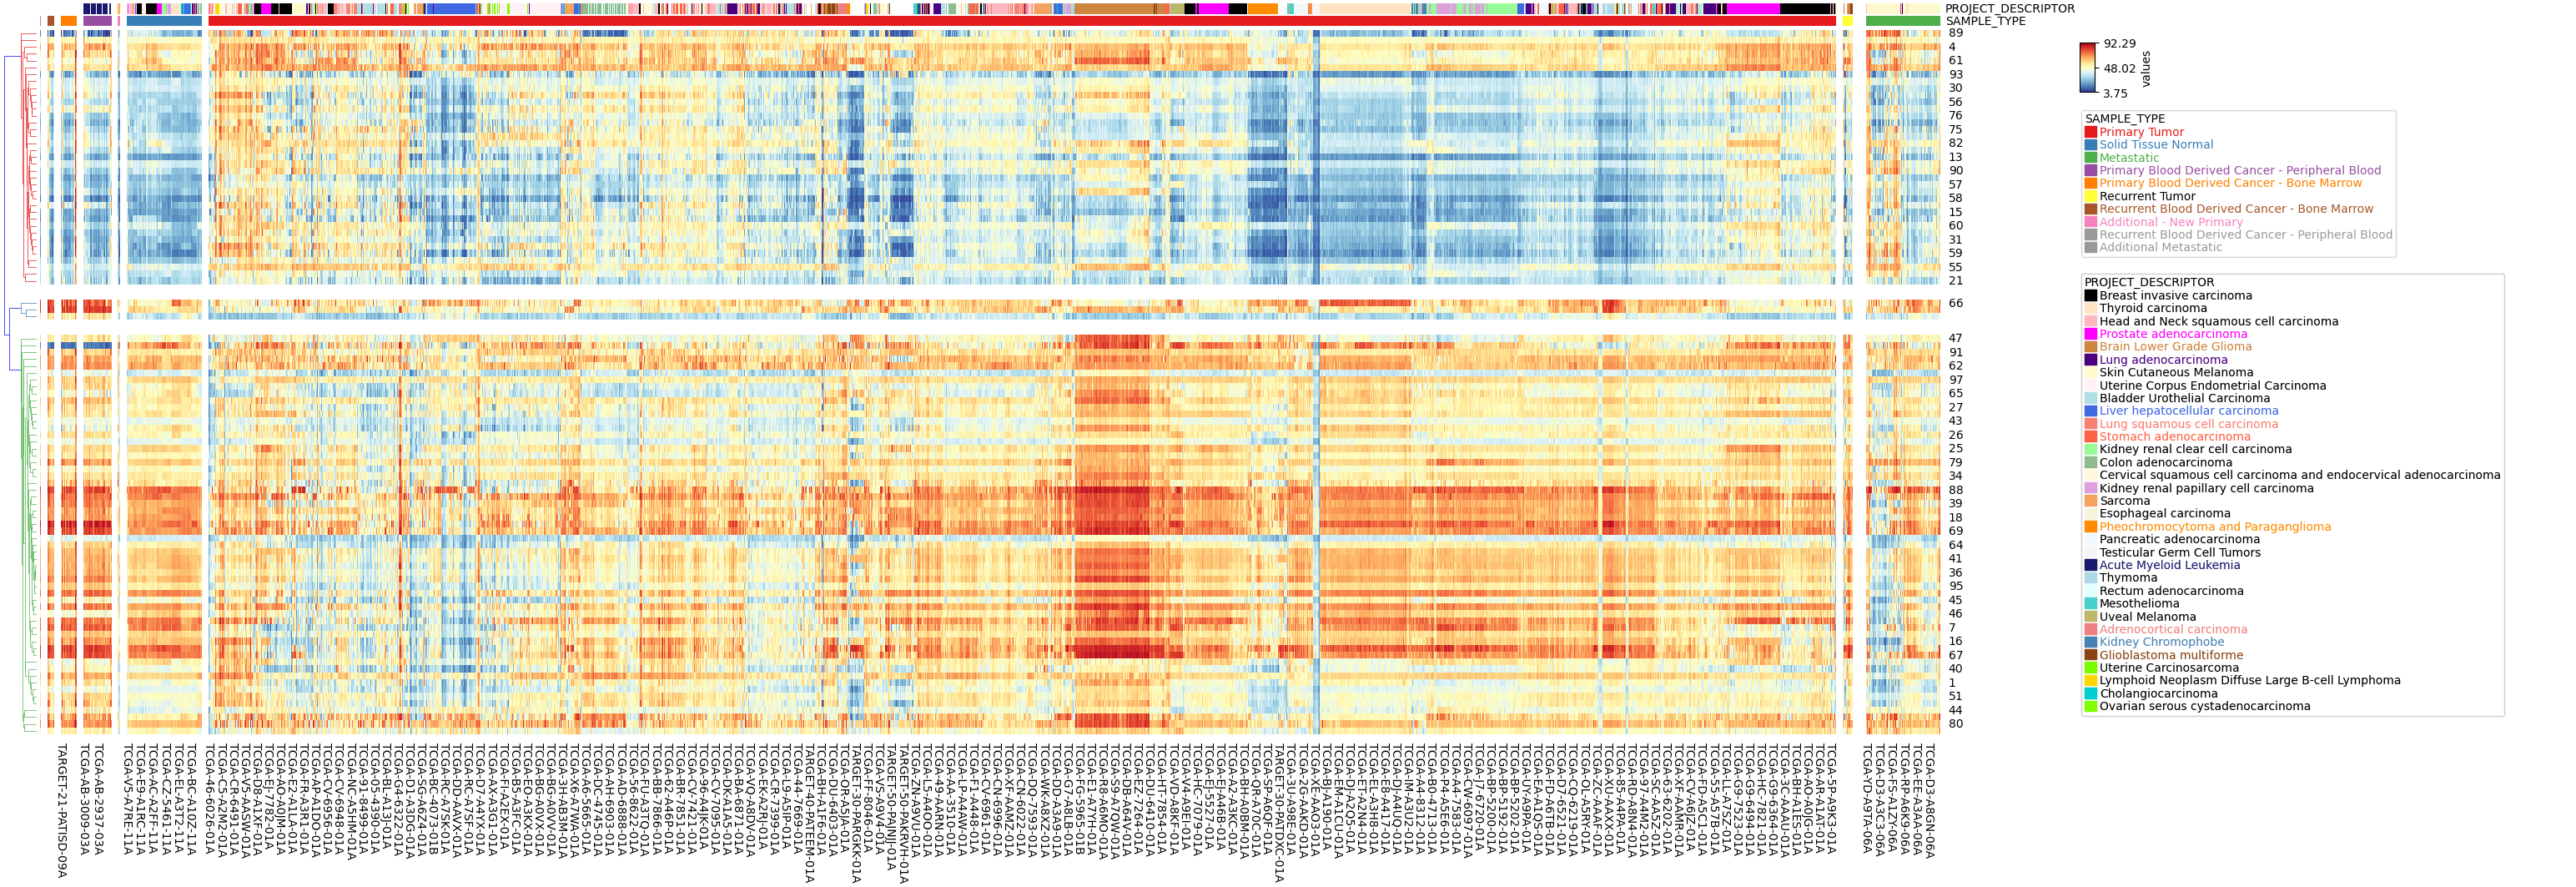

In [86]:
complex_heatplot(
    all_samples_windows_average_df, all_samples_copy, all_samples_copy.sample_type, figsize=(30, 10),
)

Starting plotting HeatmapAnnotations


/uufs/chpc.utah.edu/common/home/clementm-group1/conda/mambaforge/env/jt_methylation_project/lib/python3.11/site-packages/PyComplexHeatmap/annotations.py:234: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.plot_data.fillna(np.nan, inplace=True)
/uufs/chpc.utah.edu/common/home/clementm-group1/conda/mambaforge/env/jt_methylation_project/lib/python3.11/site-packages/PyComplexHeatmap/annotations.py:234: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.plot_data.fillna(np.nan, inplace=True)
/uufs/chpc.utah.edu/common/home/clementm-group1/conda/mambaforge

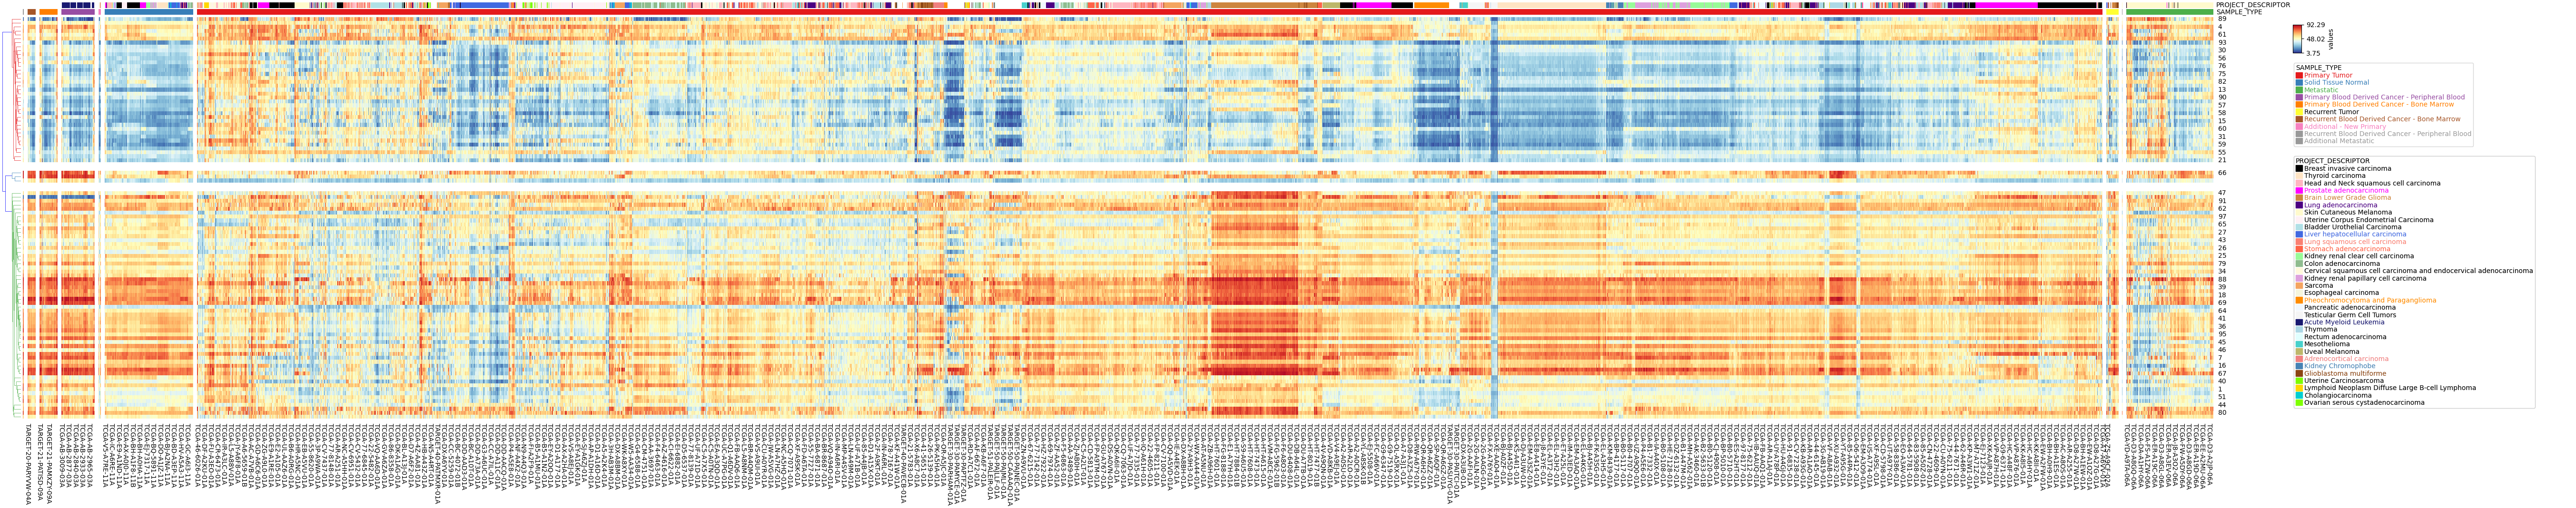

In [36]:
cm = complex_heatplot(
    all_samples_windows_average_df,
    all_samples_copy,
    all_samples_copy.sample_type,
    figsize=(60, 10),
)

In [37]:
sample_order = cm.col_order
print(sample_order)


[['TARGET-20-PATJHJ-40A', 'TARGET-20-PARUBT-40A', 'TARGET-20-PASGCE-40A'], ['TARGET-20-PARYVW-04A', 'TARGET-30-PAPVEB-04A', 'TARGET-20-PASLSD-04A', 'TARGET-20-PASWLN-04A', 'TARGET-20-PAEFGT-04A', 'TARGET-20-PARBIU-04A', 'TARGET-20-PAMYAS-04A', 'TARGET-20-PABLDZ-04A', 'TARGET-20-PARUCB-04A', 'TARGET-20-PAKIWK-04A', 'TARGET-20-PARSAN-04A', 'TARGET-20-PAEIKD-04A', 'TARGET-20-PATIAK-04A', 'TARGET-20-PASVVS-04A', 'TARGET-20-PASMGW-04A', 'TARGET-20-PASVYA-04A', 'TARGET-20-PAECCE-04A', 'TARGET-20-PARPDS-04A', 'TARGET-20-PAKTCX-04A', 'TARGET-20-PAPXRJ-04A', 'TARGET-20-PAKERZ-04A', 'TARGET-20-PADYIR-04A', 'TARGET-20-PARTAL-04A', 'TARGET-20-PATDHA-04A', 'TARGET-20-PASCGR-04A', 'TARGET-20-PASWAT-04A', 'TARGET-20-PARNIA-04A', 'TARGET-20-PAEDKB-04A', 'TARGET-20-PASJIM-04A', 'TARGET-20-PASJGZ-04A', 'TARGET-20-PASVYL-04A', 'TARGET-20-PASCRZ-04A', 'TARGET-20-PALGKX-04A', 'TARGET-20-PASTUH-04A', 'TARGET-20-PADZCG-04A', 'TARGET-20-PAEERJ-04A', 'TARGET-20-PASWPD-04A', 'TARGET-20-PASPLU-04A'], ['TARGET-21

In [38]:
import itertools

flattened_sample_order = list(itertools.chain.from_iterable(sample_order))
flattened_sample_order

['TARGET-20-PATJHJ-40A',
 'TARGET-20-PARUBT-40A',
 'TARGET-20-PASGCE-40A',
 'TARGET-20-PARYVW-04A',
 'TARGET-30-PAPVEB-04A',
 'TARGET-20-PASLSD-04A',
 'TARGET-20-PASWLN-04A',
 'TARGET-20-PAEFGT-04A',
 'TARGET-20-PARBIU-04A',
 'TARGET-20-PAMYAS-04A',
 'TARGET-20-PABLDZ-04A',
 'TARGET-20-PARUCB-04A',
 'TARGET-20-PAKIWK-04A',
 'TARGET-20-PARSAN-04A',
 'TARGET-20-PAEIKD-04A',
 'TARGET-20-PATIAK-04A',
 'TARGET-20-PASVVS-04A',
 'TARGET-20-PASMGW-04A',
 'TARGET-20-PASVYA-04A',
 'TARGET-20-PAECCE-04A',
 'TARGET-20-PARPDS-04A',
 'TARGET-20-PAKTCX-04A',
 'TARGET-20-PAPXRJ-04A',
 'TARGET-20-PAKERZ-04A',
 'TARGET-20-PADYIR-04A',
 'TARGET-20-PARTAL-04A',
 'TARGET-20-PATDHA-04A',
 'TARGET-20-PASCGR-04A',
 'TARGET-20-PASWAT-04A',
 'TARGET-20-PARNIA-04A',
 'TARGET-20-PAEDKB-04A',
 'TARGET-20-PASJIM-04A',
 'TARGET-20-PASJGZ-04A',
 'TARGET-20-PASVYL-04A',
 'TARGET-20-PASCRZ-04A',
 'TARGET-20-PALGKX-04A',
 'TARGET-20-PASTUH-04A',
 'TARGET-20-PADZCG-04A',
 'TARGET-20-PAEERJ-04A',
 'TARGET-20-PASWPD-04A',


In [39]:
selected_samples = all_samples_copy.loc[flattened_sample_order]
selected_samples


sample_type  \
sample                                                                    
TARGET-20-PATJHJ-40A  Recurrent Blood Derived Cancer - Peripheral Blood   
TARGET-20-PARUBT-40A  Recurrent Blood Derived Cancer - Peripheral Blood   
TARGET-20-PASGCE-40A  Recurrent Blood Derived Cancer - Peripheral Blood   
TARGET-20-PARYVW-04A       Recurrent Blood Derived Cancer - Bone Marrow   
TARGET-30-PAPVEB-04A       Recurrent Blood Derived Cancer - Bone Marrow   
...                                                                 ...   
TCGA-ER-A19T-06A                                             Metastatic   
TCGA-ER-A2ND-06A                                             Metastatic   
TCGA-EE-A2MS-06A                                             Metastatic   
TCGA-WE-A8ZR-06A                                             Metastatic   
TCGA-EB-A5SH-06A                                             Metastatic   

                           project_descriptor  
sample                                         
TARGET-20-PATJHJ-40A                      NaN  
TARGET-20-PARUBT-40A                      NaN  
TARGET-20-PASGCE-40A                      NaN  
TARGET-20-PARYVW-04A                      NaN  
TARGET-30-PAPVEB-04A                      NaN  
...                                       ...  
TCGA-ER-A19T-06A      Skin Cutaneous Melanoma  
TCGA-ER-A2ND-06A      Skin Cutaneous Melanoma  
TCGA-EE-A2MS-06A      Skin Cutaneous Melanoma  
TCGA-WE-A8ZR-06A      Skin Cutaneous Melanoma  
TCGA-EB-A5SH-06A      Skin Cutaneous Melanoma  

[9714 rows x 2 columns]

In [40]:
selected_samples

sample_type  \
sample                                                                    
TARGET-20-PATJHJ-40A  Recurrent Blood Derived Cancer - Peripheral Blood   
TARGET-20-PARUBT-40A  Recurrent Blood Derived Cancer - Peripheral Blood   
TARGET-20-PASGCE-40A  Recurrent Blood Derived Cancer - Peripheral Blood   
TARGET-20-PARYVW-04A       Recurrent Blood Derived Cancer - Bone Marrow   
TARGET-30-PAPVEB-04A       Recurrent Blood Derived Cancer - Bone Marrow   
...                                                                 ...   
TCGA-ER-A19T-06A                                             Metastatic   
TCGA-ER-A2ND-06A                                             Metastatic   
TCGA-EE-A2MS-06A                                             Metastatic   
TCGA-WE-A8ZR-06A                                             Metastatic   
TCGA-EB-A5SH-06A                                             Metastatic   

                           project_descriptor  
sample                                         
TARGET-20-PATJHJ-40A                      NaN  
TARGET-20-PARUBT-40A                      NaN  
TARGET-20-PASGCE-40A                      NaN  
TARGET-20-PARYVW-04A                      NaN  
TARGET-30-PAPVEB-04A                      NaN  
...                                       ...  
TCGA-ER-A19T-06A      Skin Cutaneous Melanoma  
TCGA-ER-A2ND-06A      Skin Cutaneous Melanoma  
TCGA-EE-A2MS-06A      Skin Cutaneous Melanoma  
TCGA-WE-A8ZR-06A      Skin Cutaneous Melanoma  
TCGA-EB-A5SH-06A      Skin Cutaneous Melanoma  

[9714 rows x 2 columns]

In [41]:
all_indexes = {}
i = 0
for sample, row in selected_samples.dropna().iterrows():
    if row["project_descriptor"] not in all_indexes:
        all_indexes[row["project_descriptor"]] = []
    all_indexes[row["project_descriptor"]].append(i)
    i += 1
average_indexes = {}
for project in all_indexes:
    average_indexes[project] = int(np.mean(all_indexes[project]))
ordered_average_indexes = sorted(average_indexes.items(), key=lambda x: x[1])


In [42]:
ordered_average_indexes

[('Acute Myeloid Leukemia', 66),
 ('Ovarian serous cystadenocarcinoma', 1985),
 ('Uterine Carcinosarcoma', 2008),
 ('Uterine Corpus Endometrial Carcinoma', 2335),
 ('Liver hepatocellular carcinoma', 2596),
 ('Cervical squamous cell carcinoma and endocervical adenocarcinoma', 2713),
 ('Colon adenocarcinoma', 2839),
 ('Esophageal carcinoma', 2862),
 ('Cholangiocarcinoma', 3106),
 ('Lymphoid Neoplasm Diffuse Large B-cell Lymphoma', 3143),
 ('Rectum adenocarcinoma', 3159),
 ('Bladder Urothelial Carcinoma', 3219),
 ('Head and Neck squamous cell carcinoma', 3785),
 ('Sarcoma', 3799),
 ('Adrenocortical carcinoma', 3824),
 ('Lung squamous cell carcinoma', 3949),
 ('Stomach adenocarcinoma', 4127),
 ('Brain Lower Grade Glioma', 5058),
 ('Glioblastoma multiforme', 5061),
 ('Breast invasive carcinoma', 5137),
 ('Uveal Melanoma', 5379),
 ('Pheochromocytoma and Paraganglioma', 5464),
 ('Mesothelioma', 5486),
 ('Lung adenocarcinoma', 5504),
 ('Kidney renal papillary cell carcinoma', 5753),
 ('Thyroid

In [43]:
print(ordered_average_indexes)
inter_clustered_cancers = [
    "Brain Lower Grade Glioma",
    "Glioblastoma multiforme",
    "Breast invasive carcinoma",
]

[('Acute Myeloid Leukemia', 66), ('Ovarian serous cystadenocarcinoma', 1985), ('Uterine Carcinosarcoma', 2008), ('Uterine Corpus Endometrial Carcinoma', 2335), ('Liver hepatocellular carcinoma', 2596), ('Cervical squamous cell carcinoma and endocervical adenocarcinoma', 2713), ('Colon adenocarcinoma', 2839), ('Esophageal carcinoma', 2862), ('Cholangiocarcinoma', 3106), ('Lymphoid Neoplasm Diffuse Large B-cell Lymphoma', 3143), ('Rectum adenocarcinoma', 3159), ('Bladder Urothelial Carcinoma', 3219), ('Head and Neck squamous cell carcinoma', 3785), ('Sarcoma', 3799), ('Adrenocortical carcinoma', 3824), ('Lung squamous cell carcinoma', 3949), ('Stomach adenocarcinoma', 4127), ('Brain Lower Grade Glioma', 5058), ('Glioblastoma multiforme', 5061), ('Breast invasive carcinoma', 5137), ('Uveal Melanoma', 5379), ('Pheochromocytoma and Paraganglioma', 5464), ('Mesothelioma', 5486), ('Lung adenocarcinoma', 5504), ('Kidney renal papillary cell carcinoma', 5753), ('Thyroid carcinoma', 5799), ('Pan

In [44]:
project_groups = {}
i = 0
for sample, row in selected_samples.iterrows():
    project_groups.setdefault(row["project_descriptor"], []).append(i)
    i += 1

In [45]:
custered_projects = {}

for key, value in project_groups.items():
    sorted_value = sorted(value)
    consecutive_count = 0
    for i in range(len(sorted_value) - 1):
        if sorted_value[i] + 1 == sorted_value[i + 1]:
            consecutive_count += 1
    percent_clustered = consecutive_count / len(sorted_value)
    custered_projects[key] = percent_clustered

custered_projects

{nan: 0.9257028112449799,
 'Acute Myeloid Leukemia': 0.917910447761194,
 'Pheochromocytoma and Paraganglioma': 0.9358288770053476,
 'Testicular Germ Cell Tumors': 0.9487179487179487,
 'Kidney renal clear cell carcinoma': 0.8121387283236994,
 'Kidney renal papillary cell carcinoma': 0.7953020134228188,
 'Esophageal carcinoma': 0.2857142857142857,
 'Prostate adenocarcinoma': 0.9757914338919925,
 'Bladder Urothelial Carcinoma': 0.6854460093896714,
 'Breast invasive carcinoma': 0.9075342465753424,
 'Uterine Corpus Endometrial Carcinoma': 0.8140043763676149,
 'Head and Neck squamous cell carcinoma': 0.7472324723247232,
 'Cervical squamous cell carcinoma and endocervical adenocarcinoma': 0.6634304207119741,
 'Thyroid carcinoma': 0.9804618117229129,
 'Cholangiocarcinoma': 0.4090909090909091,
 'Liver hepatocellular carcinoma': 0.9204819277108434,
 'Pancreatic adenocarcinoma': 0.7540983606557377,
 'Lung adenocarcinoma': 0.7730061349693251,
 'Lung squamous cell carcinoma': 0.5529100529100529,
 '

In [46]:
custered_projects_df = pd.DataFrame.from_dict(custered_projects, orient="index")
custered_projects_df.reset_index(inplace=True)
custered_projects_df.columns = ["project_name", "clustered_percent"]
custered_projects_df

project_name  clustered_percent
0                                                 NaN           0.925703
1                              Acute Myeloid Leukemia           0.917910
2                  Pheochromocytoma and Paraganglioma           0.935829
3                         Testicular Germ Cell Tumors           0.948718
4                   Kidney renal clear cell carcinoma           0.812139
5               Kidney renal papillary cell carcinoma           0.795302
6                                Esophageal carcinoma           0.285714
7                             Prostate adenocarcinoma           0.975791
8                        Bladder Urothelial Carcinoma           0.685446
9                           Breast invasive carcinoma           0.907534
10               Uterine Corpus Endometrial Carcinoma           0.814004
11              Head and Neck squamous cell carcinoma           0.747232
12  Cervical squamous cell carcinoma and endocervi...           0.663430
13                                  Thyroid carcinoma           0.980462
14                                 Cholangiocarcinoma           0.409091
15                     Liver hepatocellular carcinoma           0.920482
16                          Pancreatic adenocarcinoma           0.754098
17                                Lung adenocarcinoma           0.773006
18                       Lung squamous cell carcinoma           0.552910
19                            Skin Cutaneous Melanoma           0.959831
20                                            Thymoma           0.852459
21                               Colon adenocarcinoma           0.713846
22                              Rectum adenocarcinoma           0.220000
23                                            Sarcoma           0.779468
24                            Glioblastoma multiforme           0.437500
25                             Stomach adenocarcinoma           0.664879
26    Lymphoid Neoplasm Diffuse Large B-cell Lymphoma           0.750000
27                           Adrenocortical carcinoma           0.898734
28                  Ovarian serous cystadenocarcinoma           0.222222
29                             Uterine Carcinosarcoma           0.403509
30                                       Mesothelioma           0.758621
31                           Brain Lower Grade Glioma           0.938202
32                                 Kidney Chromophobe           0.742424
33                                     Uveal Melanoma           0.937500

In [47]:
custered_projects_df[
        (custered_projects_df["clustered_percent"] < 0.30) & (custered_projects_df["project_name"].isna() == False)
    ]

project_name  clustered_percent
6                Esophageal carcinoma           0.285714
22              Rectum adenocarcinoma           0.220000
28  Ovarian serous cystadenocarcinoma           0.222222

In [48]:
custered_projects_df[
        (custered_projects_df["clustered_percent"] > 0.95) & (custered_projects_df["project_name"].isna() == False)
    ]

project_name  clustered_percent
7   Prostate adenocarcinoma           0.975791
13        Thyroid carcinoma           0.980462
19  Skin Cutaneous Melanoma           0.959831

In [49]:
clustered_cancers = list(
    custered_projects_df[
        (custered_projects_df["clustered_percent"] > 0.95) & (custered_projects_df["project_name"].isna() == False)
    ]["project_name"]
)

In [50]:
clustered_cancers

['Prostate adenocarcinoma', 'Thyroid carcinoma', 'Skin Cutaneous Melanoma']

In [51]:
def plot_subset(project_ids):
    samples = all_samples_copy[all_samples_copy.project_descriptor.isin(project_ids)]
    samples_averages = all_samples_windows_average_df[samples.index]
    cm = complex_heatplot(
        samples_averages,
        samples,
        samples.sample_type,
        figsize=(30, 10),
        project_cmap="Set2",
    )
    return cm

Starting plotting HeatmapAnnotations


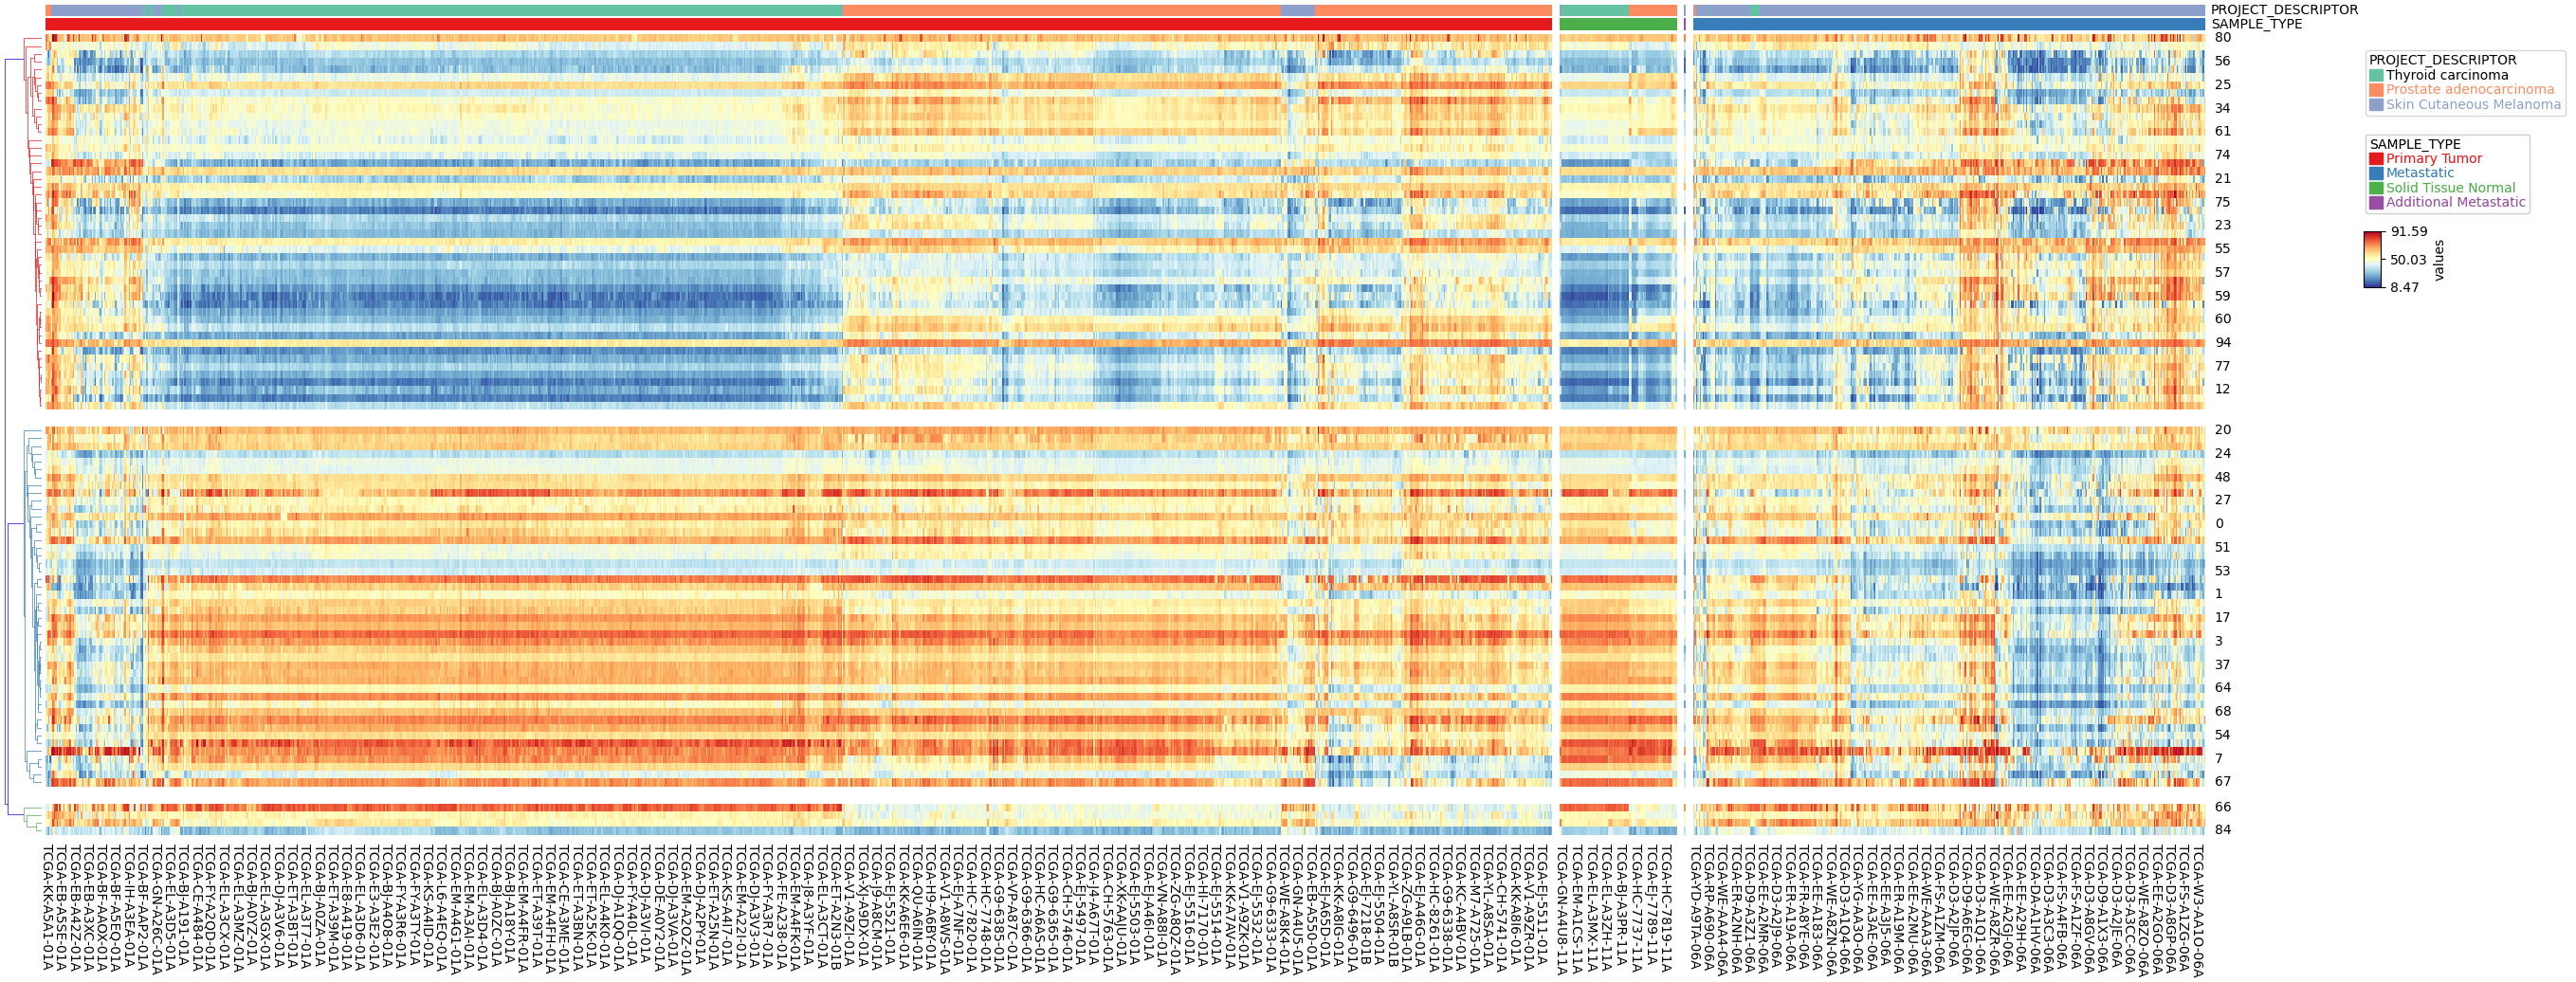

In [52]:
cm = plot_subset(clustered_cancers)

In [53]:
samples_order = list(itertools.chain.from_iterable(cm.col_order))

In [54]:
clustered_samples_meth_info = all_samples.drop(
    ["CpG_chrm", "CpG_beg", "chrom_num"], axis=1
)

In [55]:
clustered_samples_meth_info = clustered_samples_meth_info.loc[:, samples_order]

In [56]:
def plot_random_sample(project_ids, num_samples=50):
    samples = all_samples_copy[all_samples_copy.project_descriptor.isin(project_ids)]
    samples_averages = all_samples_windows_average_df[samples.index]
    import random

    # Set the number of samples to choose from each project type
    samples_per_project = num_samples

    # Get the unique project types
    project_types = samples["project_descriptor"].unique()

    # Create an empty list to store the selected samples
    samples_samples = []

    # Iterate over each project type
    for project_type in project_types:
        # Get the samples for the current project type
        project_samples = samples[samples["project_descriptor"] == project_type]

        #     # Check if there are enough samples for the current project type
        if len(project_samples) >= samples_per_project:
            # Randomly select samples from the current project type
            samples_samples.extend(
                random.sample(list(project_samples.index), samples_per_project)
            )
        else:
            # If there are not enough samples, select all samples from the current project type
            samples_samples.extend(list(project_samples.index))

    # # Get the selected samples from the clustered_samples_meth_info dataframe
    samples_samples
    sampled_samples_averages = all_samples_windows_average_df[samples_samples]

    sampled_samples_info = samples.loc[samples_samples]
    return complex_heatplot(
        sampled_samples_averages,
        sampled_samples_info,
        sampled_samples_info.sample_type,
        figsize=(30, 10),
        project_cmap="Set2",
    )

Starting plotting HeatmapAnnotations


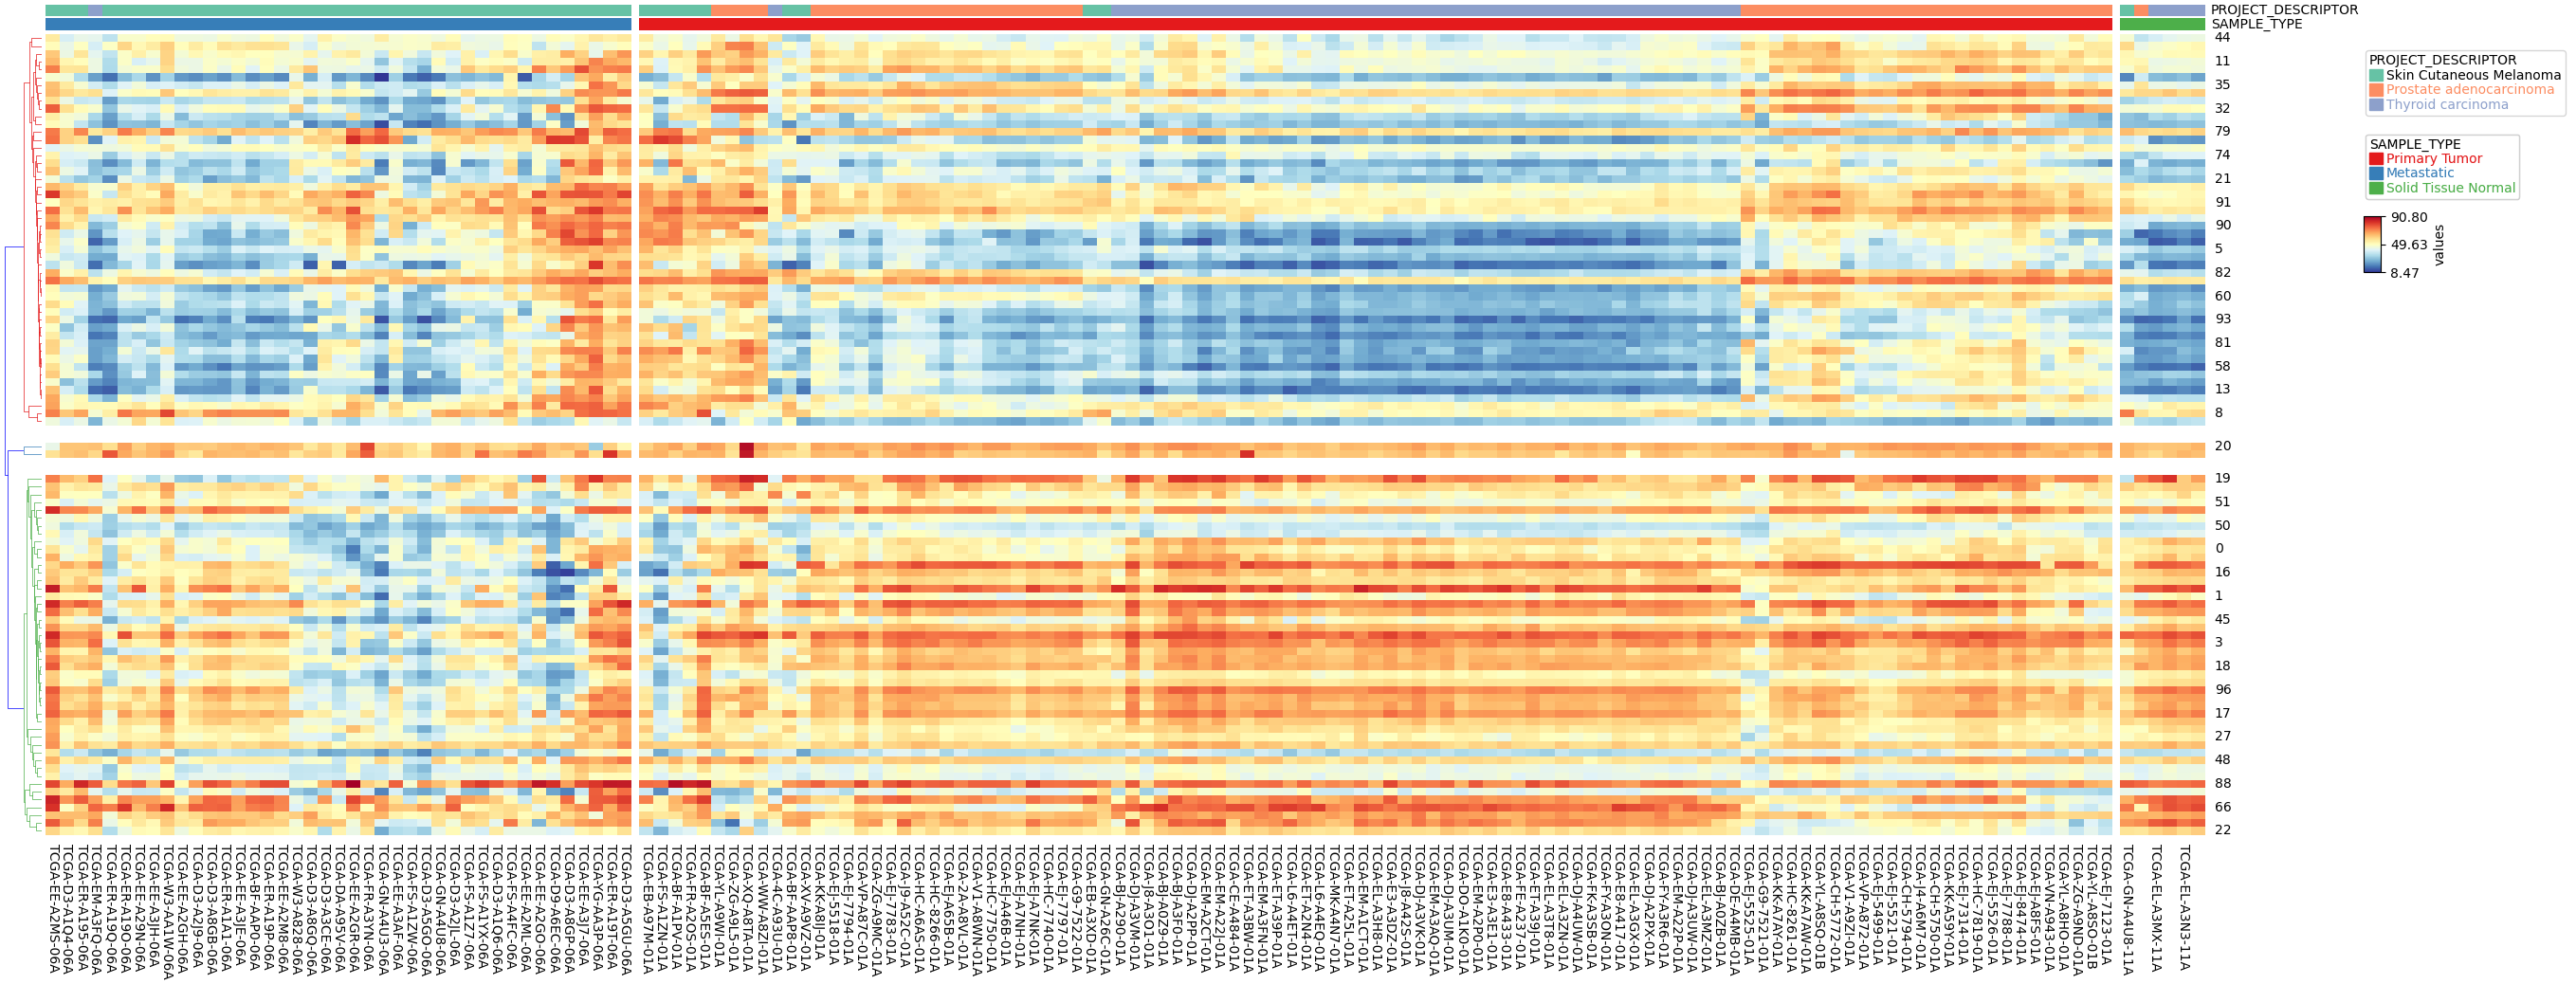

In [57]:
cm = plot_random_sample(clustered_cancers)

In [58]:
samples_order = list(itertools.chain.from_iterable(cm.col_order))

In [59]:
sampled_samples_meth_info = all_samples.drop(
    ["CpG_chrm", "CpG_beg", "chrom_num"], axis=1
)

In [60]:
sampled_samples_meth_info = sampled_samples_meth_info.loc[:, samples_order]

In [61]:
# cm = complex_heatplot(
#     sampled_samples_meth_info,
#     sampled_samples_info,
#     None,
#     figsize=(30, 10),
#     row_cluster=False,
#     col_cluster=False,
# )

In [62]:
ordered_average_indexes

[('Acute Myeloid Leukemia', 66),
 ('Ovarian serous cystadenocarcinoma', 1985),
 ('Uterine Carcinosarcoma', 2008),
 ('Uterine Corpus Endometrial Carcinoma', 2335),
 ('Liver hepatocellular carcinoma', 2596),
 ('Cervical squamous cell carcinoma and endocervical adenocarcinoma', 2713),
 ('Colon adenocarcinoma', 2839),
 ('Esophageal carcinoma', 2862),
 ('Cholangiocarcinoma', 3106),
 ('Lymphoid Neoplasm Diffuse Large B-cell Lymphoma', 3143),
 ('Rectum adenocarcinoma', 3159),
 ('Bladder Urothelial Carcinoma', 3219),
 ('Head and Neck squamous cell carcinoma', 3785),
 ('Sarcoma', 3799),
 ('Adrenocortical carcinoma', 3824),
 ('Lung squamous cell carcinoma', 3949),
 ('Stomach adenocarcinoma', 4127),
 ('Brain Lower Grade Glioma', 5058),
 ('Glioblastoma multiforme', 5061),
 ('Breast invasive carcinoma', 5137),
 ('Uveal Melanoma', 5379),
 ('Pheochromocytoma and Paraganglioma', 5464),
 ('Mesothelioma', 5486),
 ('Lung adenocarcinoma', 5504),
 ('Kidney renal papillary cell carcinoma', 5753),
 ('Thyroid

In [63]:
inter_clustered_cancers = [
    "Cholangiocarcinoma",
    "Rectum adenocarcinoma",
    "Bladder Urothelial Carcinoma",
]

In [64]:
inter_clustered_cancers = [
    "Esophageal carcinoma",
    # "Cholangiocarcinoma",
    "Lymphoid Neoplasm Diffuse Large B-cell Lymphoma",
    "Rectum adenocarcinoma",
    # "Ovarian serous cystadenocarcinoma",
]

Starting plotting HeatmapAnnotations


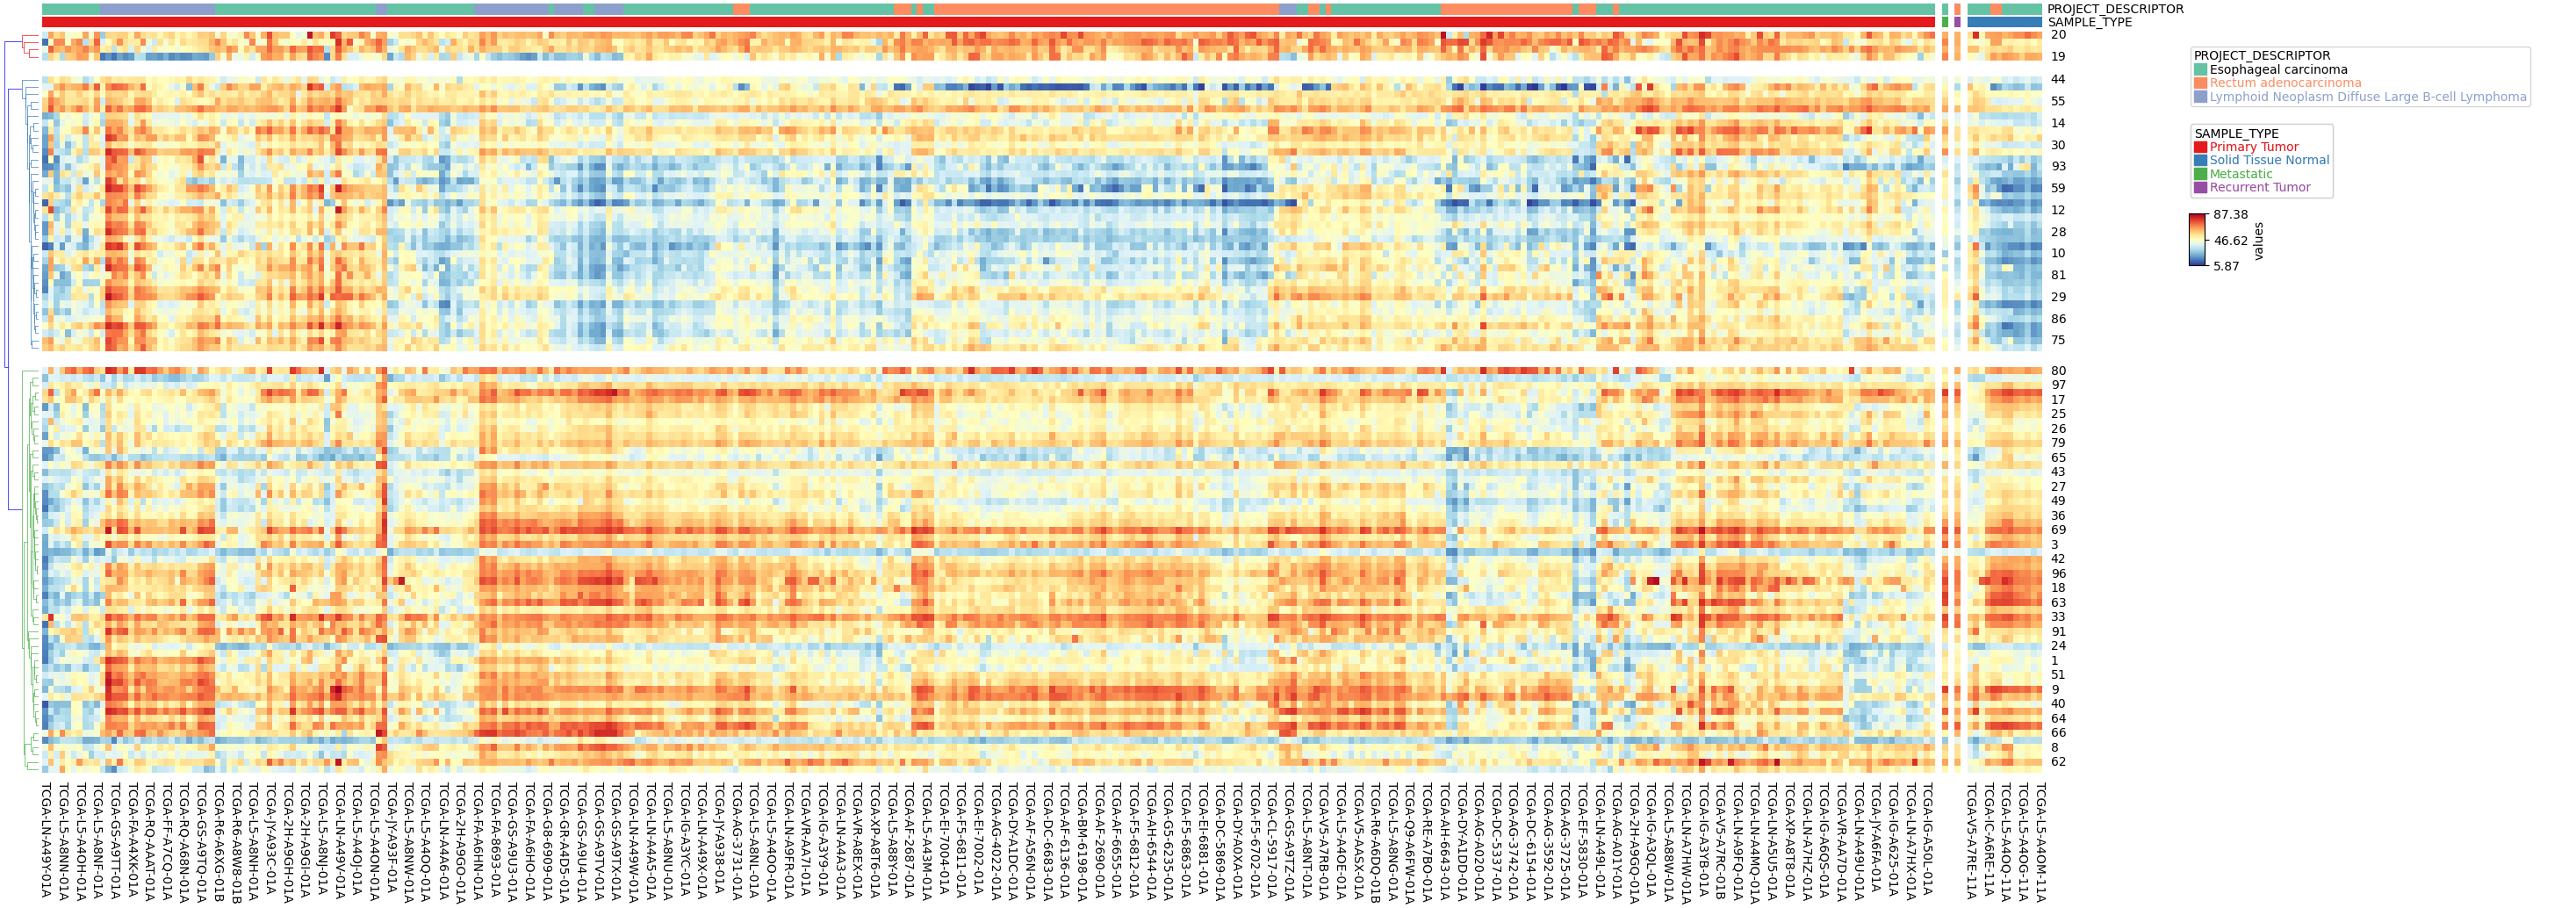

In [65]:
cm = plot_subset(inter_clustered_cancers)

Starting plotting HeatmapAnnotations


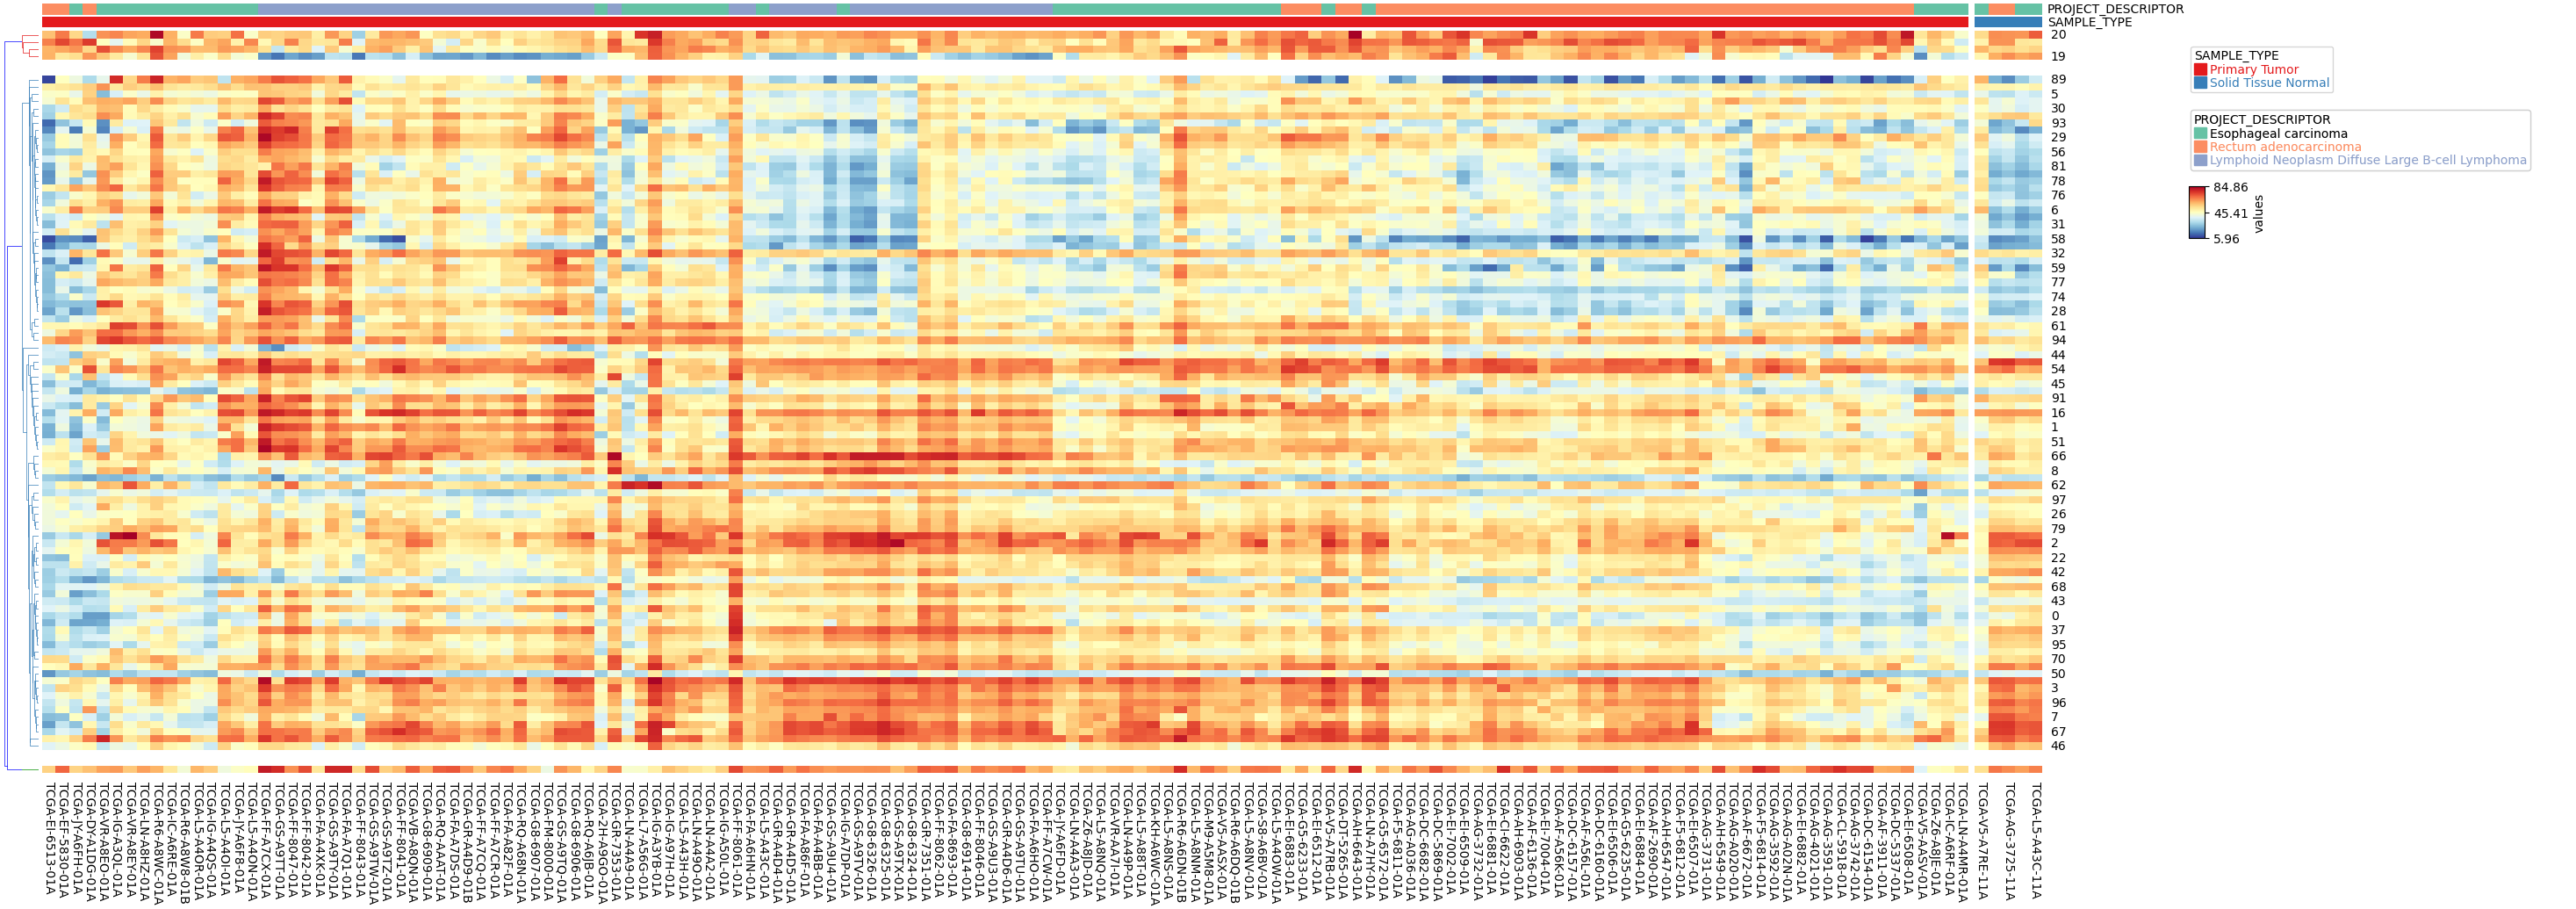

In [66]:
cm = plot_random_sample(inter_clustered_cancers)

In [67]:
len(windows_to_analyze)

98

In [68]:
windows_to_analyze_all = feather.read_feather("shared_data/windows_to_analyze.feather")

In [69]:
len(windows_to_analyze_all)

145

In [70]:
windows_to_analyze

index chrom      start        end  length CpG_chrm  chrom_num  \
0       3  chr1     910429     924641   14212     chr1          1   
1     149  chr1    3024260    3084437   60177     chr1          1   
2     204  chr1    3533662    3579462   45800     chr1          1   
3     463  chr1   18684521   18875365  190844     chr1          1   
4     556  chr1   24931074   25067262  136188     chr1          1   
..    ...   ...        ...        ...     ...      ...        ...   
93  15709  chr8   11679041   11703773   24732     chr8          8   
94  16054  chr8   98947373   99859902  912529     chr8          8   
95  16267  chr8  143183416  143248530   65114     chr8          8   
96  16722  chr9  135500901  135804653  303752     chr9          9   
97  16803  chr9  137435117  137465024   29907     chr9          9   

    count_in_window coverage_percentage  intermediate_percent  dist_to_next  \
0                23  0.9721059223474683              0.625000     1488917.0   
1                40  0.9081625433074708              0.634146       55150.0   
2                21  0.9539062118772264              0.636364    13665938.0   
3                24  0.9119062565390249              0.600000     6055709.0   
4                33  0.9310898223204782              0.647059    22366277.0   
..              ...                 ...                   ...           ...   
93               24  0.9291503046397529              0.640000    42754095.0   
94               23  0.8825519947381552              0.625000    42230004.0   
95               23  0.8875442379249797              0.625000           NaN   
96               45  0.8632304673407073              0.608696     1630464.0   
97               21  0.9711349384025241              0.636364           NaN   

                 window name  
0         chr1:910429-924641  
1       chr1:3024260-3084437  
2       chr1:3533662-3579462  
3     chr1:18684521-18875365  
4     chr1:24931074-25067262  
..                       ...  
93    chr8:11679041-11703773  
94    chr8:98947373-99859902  
95  chr8:143183416-143248530  
96  chr9:135500901-135804653  
97  chr9:137435117-137465024  

[98 rows x 12 columns]

In [71]:
windows_to_analyze_all

index chrom      start        end  length CpG_chrm  chrom_num  \
0        3  chr1     910429     924641   14212     chr1          1   
1       12  chr1     981482    1007636   26154     chr1          1   
2      115  chr1    2413558    2442415   28857     chr1          1   
3      132  chr1    2629614    2876138  246524     chr1          1   
4      140  chr1    2922239    2947235   24996     chr1          1   
..     ...   ...        ...        ...     ...      ...        ...   
140  16180  chr8  142089906  142252156  162250     chr8          8   
141  16214  chr8  143183416  143248530   65114     chr8          8   
142  16333  chr9   34457130   34624082  166952     chr9          9   
143  16659  chr9  135500901  135804653  303752     chr9          9   
144  16738  chr9  137435117  137465024   29907     chr9          9   

     count_in_window coverage_percentage  intermediate_percent  dist_to_next  
0                 23  0.9721078397730653              0.625000       56841.0  
1                 21   0.941348492820595              0.636364     1405922.0  
2                 21  0.9088374890283151              0.636364      187199.0  
3                 49  0.8648802170652078              0.620000       46101.0  
4                 22  0.9084685645834503              0.782609       77025.0  
..               ...                 ...                   ...           ...  
140               41  0.8571768868715017              0.642857      931260.0  
141               23  0.8875517774450993              0.666667           NaN  
142               22  0.9119679990587959              0.652174   100876819.0  
143               44  0.8633280679904278              0.622222     1630464.0  
144               21  0.9711680903096863              0.636364           NaN  

[145 rows x 11 columns]

In [72]:
from pybedtools import BedTool

In [73]:
windows_to_analyze_all_bed = BedTool.from_dataframe(windows_to_analyze_all[['chrom', 'start', 'end']])

In [74]:
windows_to_analyze_bed = BedTool.from_dataframe(windows_to_analyze[['chrom', 'start', 'end']])

In [75]:
normal_only_windows = windows_to_analyze_all_bed.subtract(windows_to_analyze_bed)
print(normal_only_windows.head())

chr1	981482	1007636
 chr1	2413558	2442415
 chr1	2629614	2876138
 chr1	2922239	2947235
 chr1	3139587	3168881
 chr1	17245400	17406231
 chr1	118989233	119367581
 chr1	156816217	156881647
 chr1	220887017	221337546
 chr10	48456572	48605261
 None


Shared: 27493390 Unique to with_normal_samples: 16912579 Unique to cancer_only: 830686
Percent shared (to cancer_only): 0.9706720882968962 Percent shared (to with_normal_samples): 0.6191372605786398
Percent unique (cancer_only): 0.029327911703103747 Percent unique (with_normal_samples): 0.38086273942136023


/tmp/venn.jpg


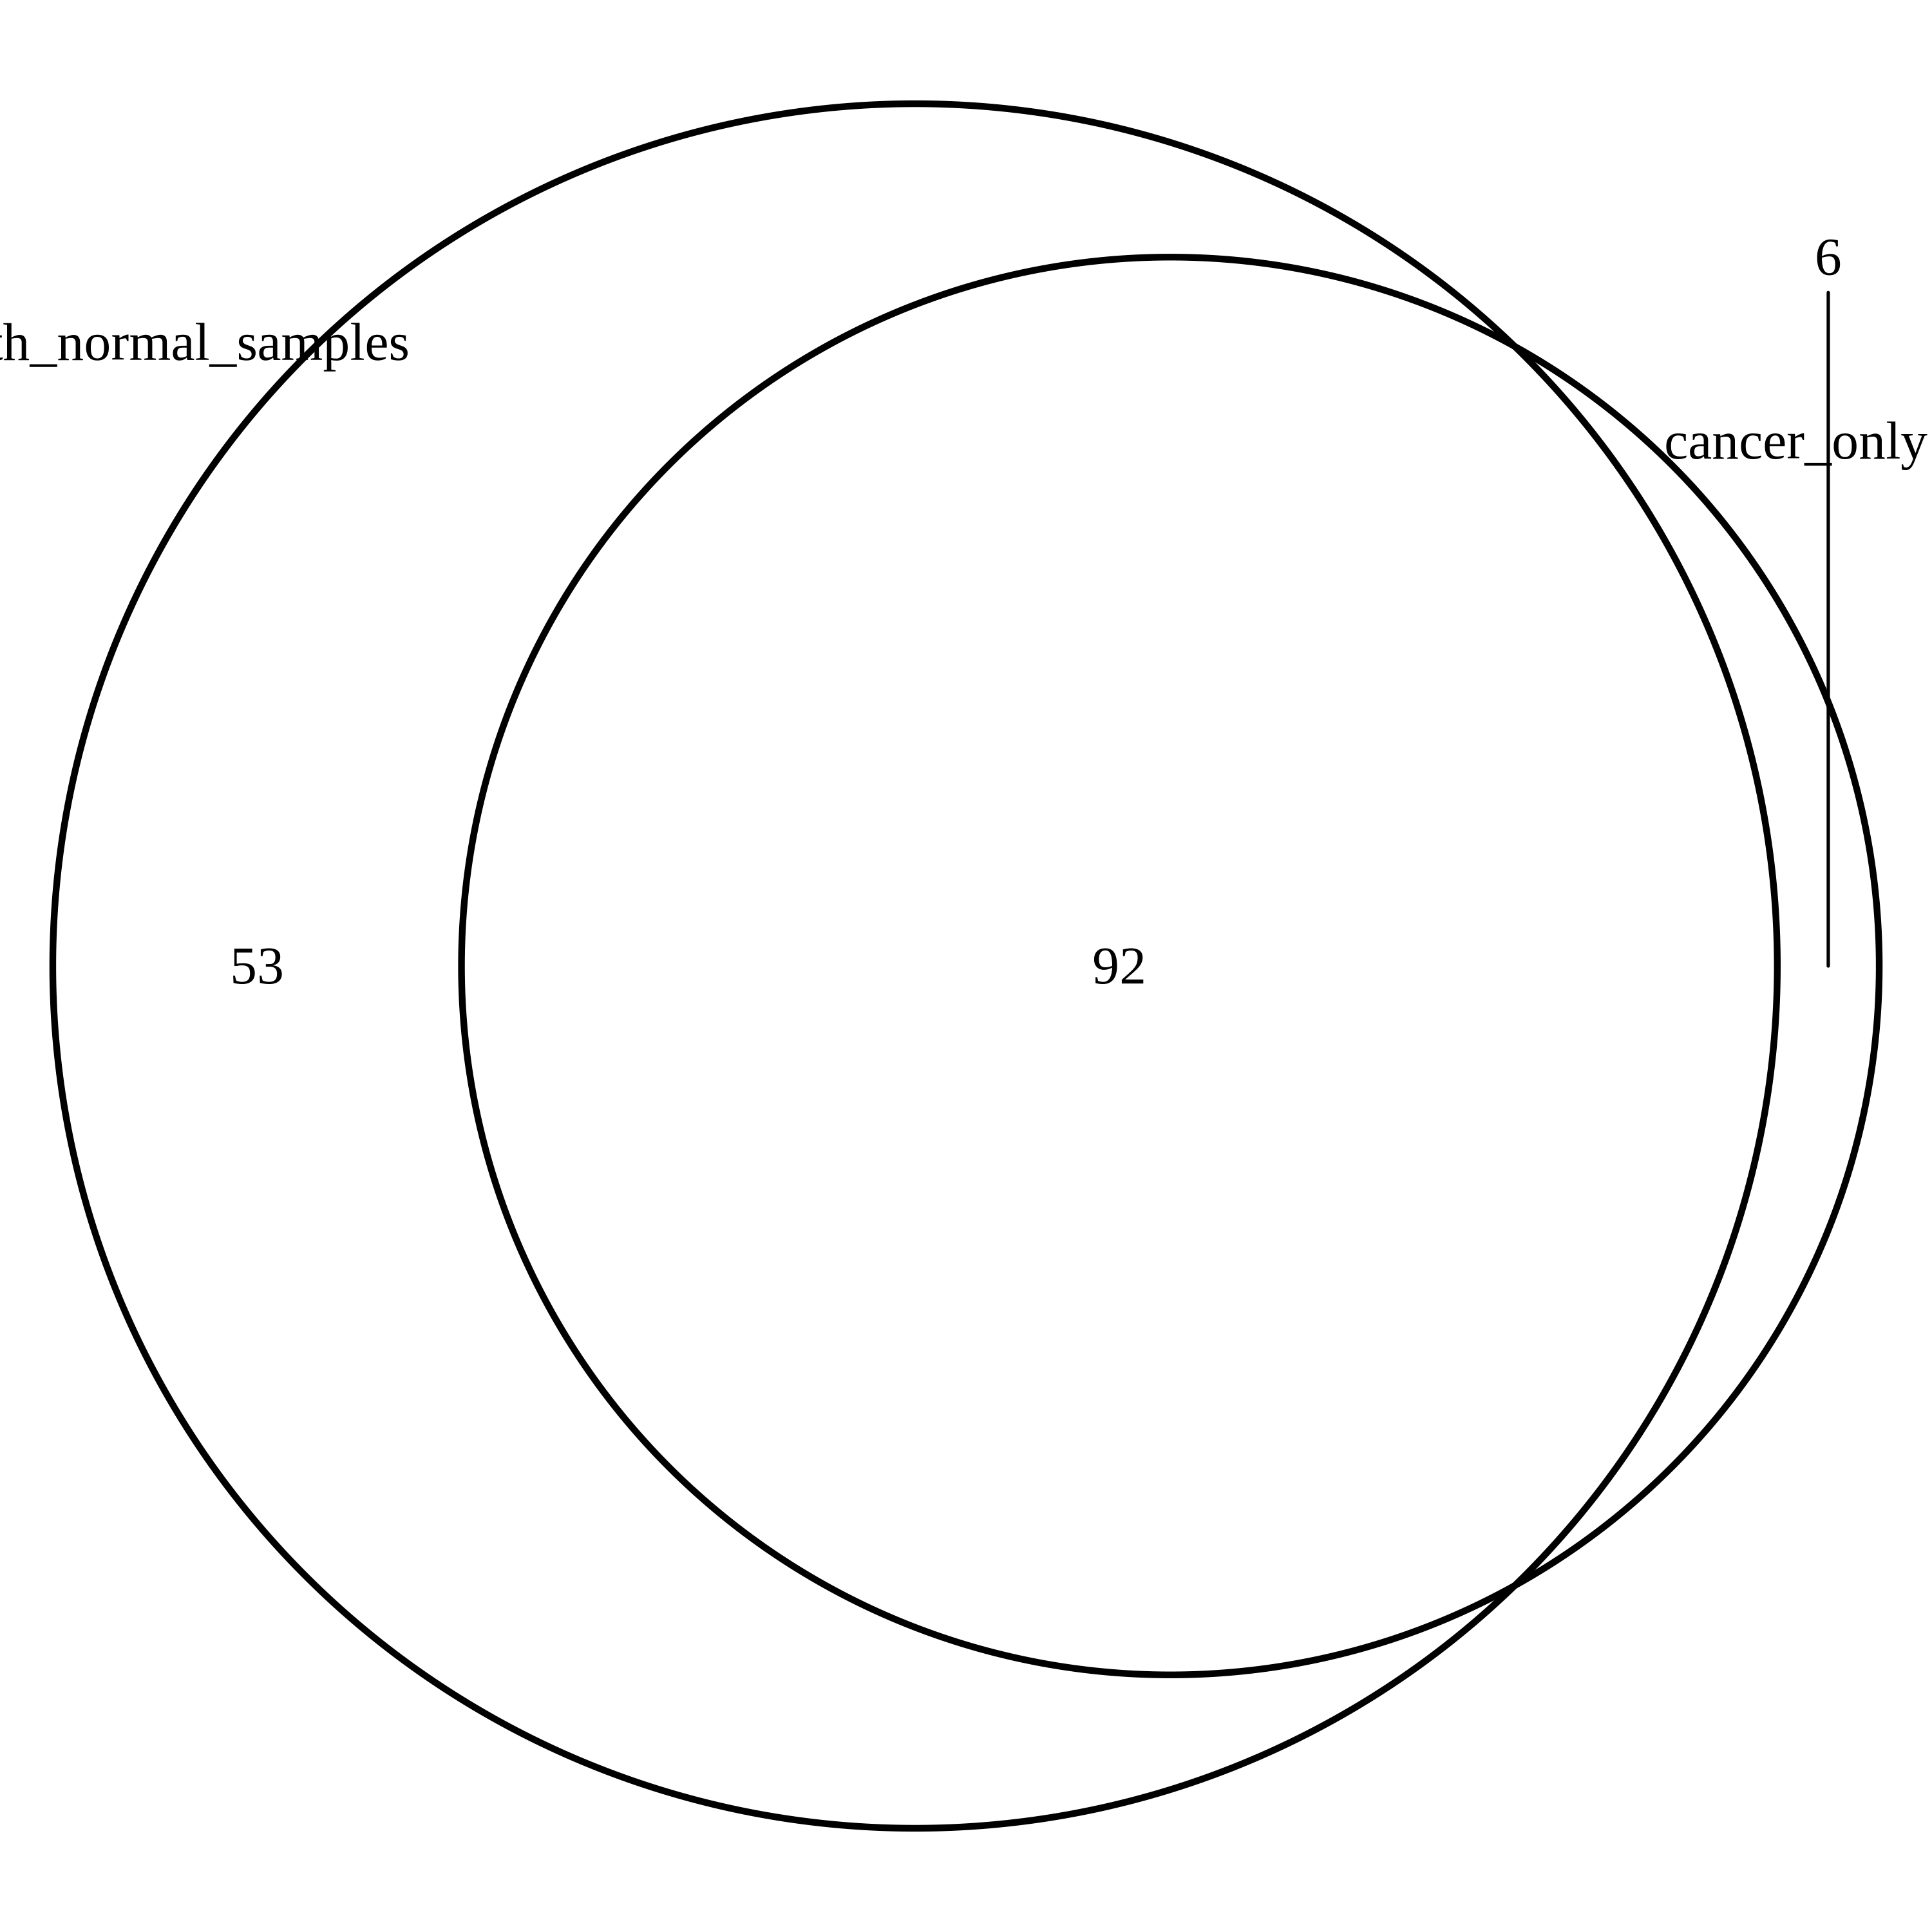

(<BedTool(/tmp/pybedtools.idkoe81r.tmp)>,
 <BedTool(/tmp/pybedtools.ruxnr62d.tmp)>,
 <BedTool(/tmp/pybedtools.xhjn_88_.tmp)>)

In [76]:
from methylation_utils.methylation_utils.utils import compare_bed_dfs


compare_bed_dfs(
    windows_to_analyze_all,
    windows_to_analyze,
    "with_normal_samples",
    "cancer_only",
    df1_colms=["chrom", "start", "end"],
    df2_colms=["chrom", "start", "end"],
)

In [77]:
normal_only_windows_average = populate_window_averages(
    normal_only_windows.to_dataframe(), all_samples
)
normal_only_windows_average_df = pd.DataFrame(
    normal_only_windows_average,
    columns=all_samples.drop(["CpG_chrm", "CpG_beg", "chrom_num"], axis=1).columns,
)
normal_only_windows_average_df

TCGA-EX-A1H6-01B  TCGA-C5-A7CM-01A  TCGA-C5-A2M1-01A  TCGA-LP-A5U2-01A  \
0          44.509804         35.860000         35.784314         22.196078   
1          58.342857         53.200000         55.800000         41.828571   
2          64.865979         55.886598         60.309278         69.494845   
3          68.150000         69.475000         68.400000         75.450000   
4          81.196721         67.316667         78.803279         74.786885   
..               ...               ...               ...               ...   
57         80.142857         77.285714         86.571429         59.571429   
58         50.070588         59.011765         49.476190         71.752941   
59         70.462963         63.132075         64.222222         72.264151   
60         77.621622         60.594595         67.621622         73.864865   
61         39.921569         28.442308         38.615385         27.235294   

    TCGA-EK-A3GK-01A  TCGA-Q1-A73P-01A  TCGA-UC-A7PI-01A  TCGA-JX-A3Q8-01A  \
0          33.980392         37.764706         35.705882         46.450980   
1          38.314286         61.647059         59.514286         68.794118   
2          47.556701         71.855670         66.385417         62.649485   
3          52.875000         79.800000         74.950000         72.800000   
4          53.622951         79.032787         78.423729         80.490196   
..               ...               ...               ...               ...   
57         86.000000         86.714286         86.000000         89.285714   
58         48.280488         71.646341         74.543210         46.178571   
59         50.867925         78.943396         76.730769         63.094340   
60         53.378378         78.111111         76.810811         69.459459   
61         26.509804         41.583333         34.291667         44.098039   

    TCGA-EA-A556-01A  TCGA-C5-A1ME-01A  ...  TCGA-EW-A1P1-01A  \
0          43.843137         39.959184  ...         42.901961   
1          54.142857         63.764706  ...         57.205882   
2          35.546392         64.694737  ...         61.030928   
3          33.825000         80.125000  ...         68.775000   
4          37.033333         80.213115  ...         72.295082   
..               ...               ...  ...               ...   
57         49.714286         90.000000  ...         62.000000   
58         42.151163         62.146341  ...         50.583333   
59         31.259259         70.716981  ...         60.370370   
60         33.905405         78.328767  ...         69.202703   
61         31.634615         36.680000  ...         32.307692   

    TCGA-OL-A66L-01A  TCGA-AR-A0TR-01A  TCGA-BH-A0HA-01A  TCGA-BH-A1ES-06A  \
0          46.078431         43.137255         42.240000         39.176471   
1          61.264706         65.617647         58.647059         50.114286   
2          54.432990         45.628866         48.927835         47.432990   
3          50.325000         35.350000         47.625000         43.675000   
4          62.672414         46.881356         63.000000         56.311475   
..               ...               ...               ...               ...   
57         80.000000         70.333333         73.833333         86.857143   
58         51.294872         47.701299         51.814815         50.611765   
59         53.622642         42.411765         57.415094         36.370370   
60         64.694444         55.263889         75.821918         67.000000   
61         34.812500         28.083333         36.392157         34.760000   

    TCGA-E2-A15J-01A  TCGA-B6-A40C-01A  TCGA-BH-A0B3-11B  TCGA-E9-A1QZ-01A  \
0          41.137255         40.627451         43.098039         40.882353   
1          53.657143         53.142857         55.205882         57.000000   
2          52.762887         50.731959         57.701031         53.257732   
3          63.900000         53.525000         65.875000         56.425000   
4          62.583333  

Starting plotting HeatmapAnnotations


/uufs/chpc.utah.edu/common/home/clementm-group1/conda/mambaforge/env/jt_methylation_project/lib/python3.11/site-packages/PyComplexHeatmap/annotations.py:234: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.plot_data.fillna(np.nan, inplace=True)
/uufs/chpc.utah.edu/common/home/clementm-group1/conda/mambaforge/env/jt_methylation_project/lib/python3.11/site-packages/PyComplexHeatmap/annotations.py:234: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.plot_data.fillna(np.nan, inplace=True)
/uufs/chpc.utah.edu/common/home/clementm-group1/conda/mambaforge

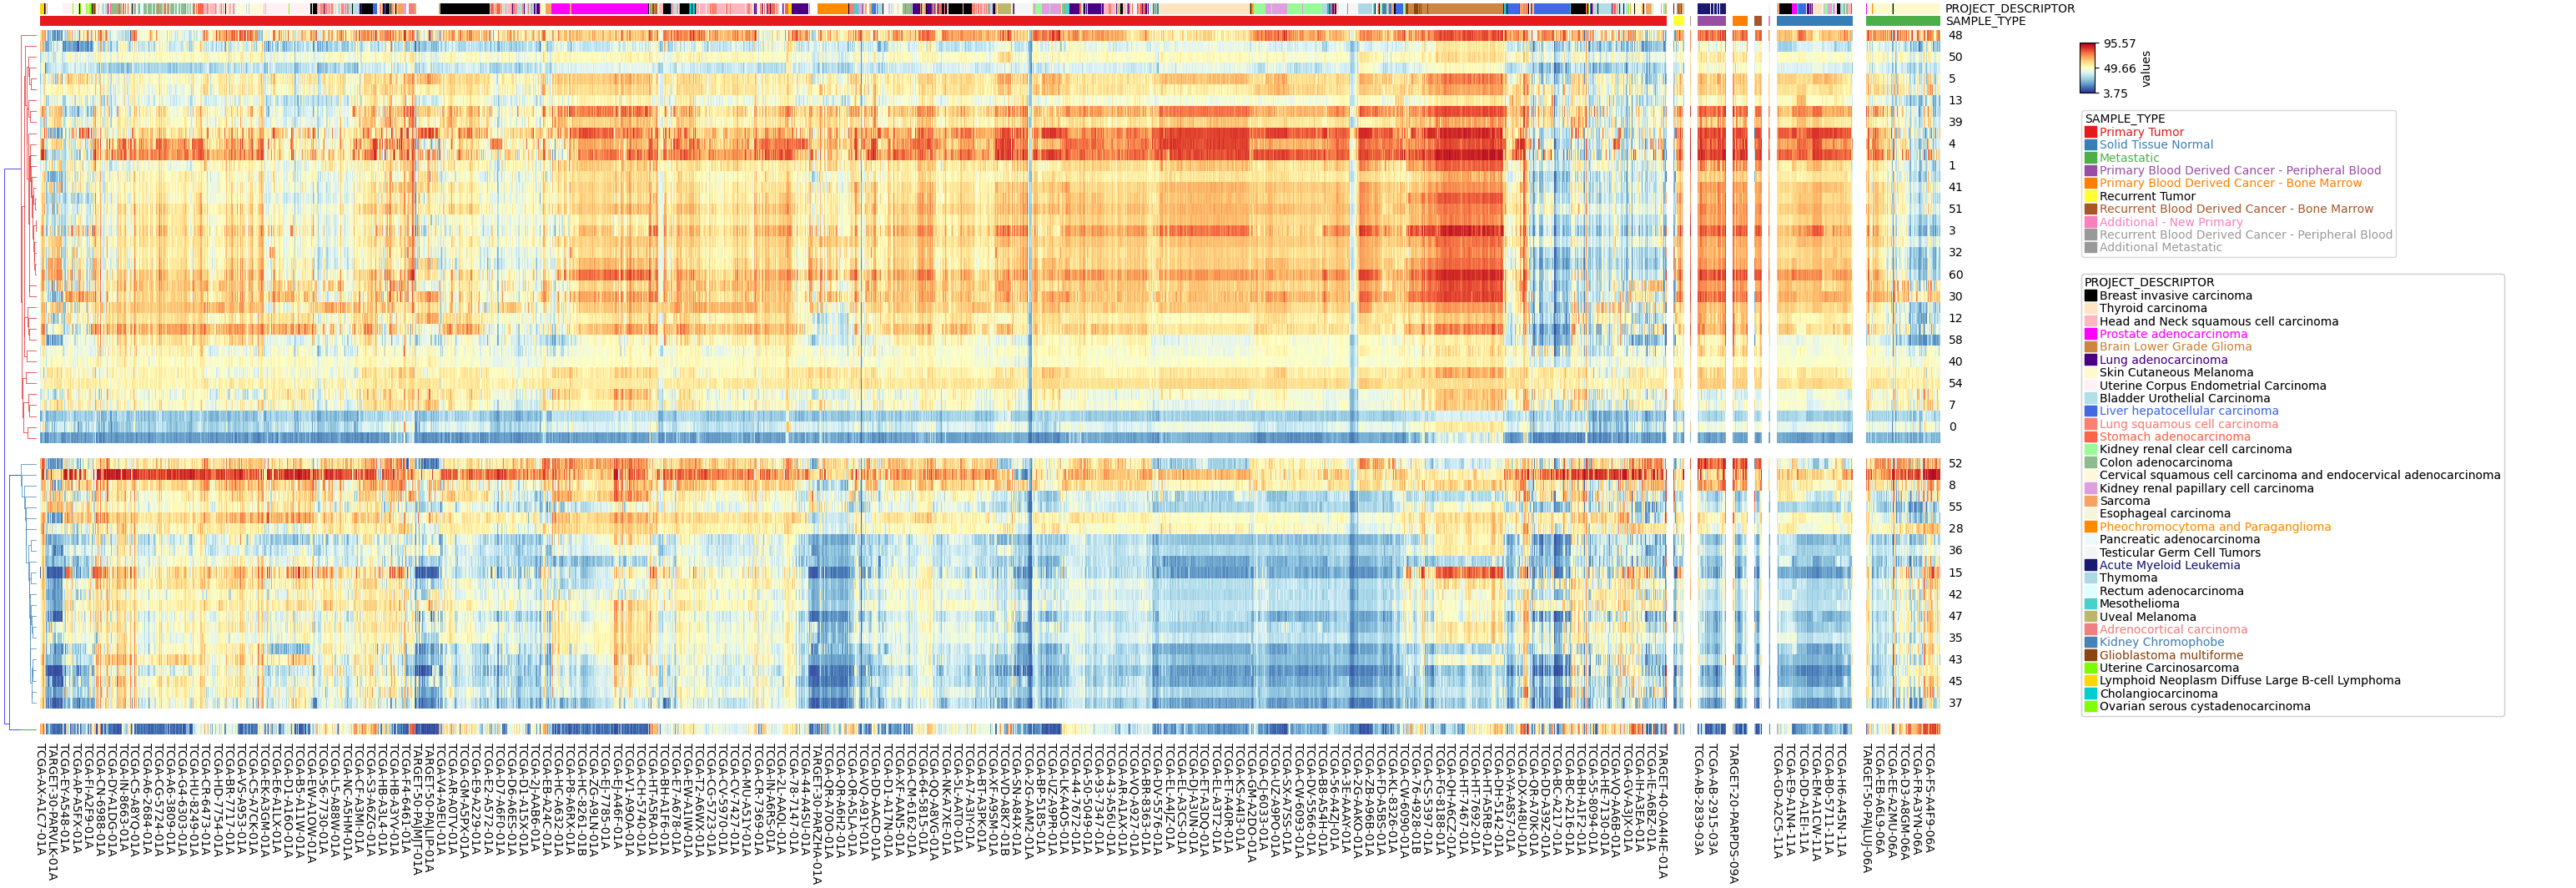

In [78]:
cm = complex_heatplot(
    normal_only_windows_average_df,
    all_samples_copy,
    all_samples_copy.sample_type,
    figsize=(30, 10),
)

In [79]:
window_stats = windows_to_analyze[["window name", "length", "count_in_window"]]
window_stats

window name  length  count_in_window
0         chr1:910429-924641   14212               23
1       chr1:3024260-3084437   60177               40
2       chr1:3533662-3579462   45800               21
3     chr1:18684521-18875365  190844               24
4     chr1:24931074-25067262  136188               33
..                       ...     ...              ...
93    chr8:11679041-11703773   24732               24
94    chr8:98947373-99859902  912529               23
95  chr8:143183416-143248530   65114               23
96  chr9:135500901-135804653  303752               45
97  chr9:137435117-137465024   29907               21

[98 rows x 3 columns]

In [80]:
pd.set_option("display.float_format", lambda x: "%.3f" % x)
window_stats.describe()

length  count_in_window
count      98.000           98.000
mean   289021.184           34.286
std    545289.888           16.208
min      9185.000           21.000
25%     56269.500           24.000
50%    122661.000           28.000
75%    286772.250           39.750
max   4413217.000          125.000